In [107]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
miadul_asthma_synthetic_medical_dataset_path = kagglehub.dataset_download('miadul/asthma-synthetic-medical-dataset')

print('Data source import complete.')


Data source import complete.


# Asthma Detection Model

## Problem Statement

Asthma is a chronic respiratory condition that can significantly impact quality of life and, in severe cases, lead to hospitalization or death. Early detection is crucial for effective management and treatment.

In this project, we aim to analyze a synthetic medical dataset to understand the patterns and risk factors associated with asthma.

Through exploratory data analysis (EDA) and visualizations, we uncover meaningful insights about the data, such as the role of age, gender, comorbidities, and symptoms in asthma risk.
Following the analysis phase, we develop a machine learning model that predicts whether an individual is at risk of asthma. The objective is to:
- Perform in-depth data analysis and visualization to understand feature relationships.
- Identify and interpret key predictive features.
- Build a supervised classification model to predict asthma risk.
- Support early screening and healthcare decision-making using data-driven insights.


---

This framework provides a clear narrative—from data understanding to model insights—making your notebook robust and informative. Let me know if you'd like help writing the EDA, training code, or interpreting model outputs!
::contentReference[oaicite:5]{index=5}


In [108]:
# imoprting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [109]:
# plot style
sns.set(style="whitegrid")

In [110]:
# Models and Utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [111]:
# tensorflow module
import tensorflow as tf

In [112]:
# Model Saving
import pickle as pkl

In [113]:
# warnings
import warnings
warnings.filterwarnings("ignore")


In [114]:
# importing data
df = pd.read_csv(f"{miadul_asthma_synthetic_medical_dataset_path}/synthetic_asthma_dataset.csv")

df.head(10)

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN
5,ASTH100005,83,Other,27.8,Never,1,Pollen,Moderate,Moderate,Outdoor,NaN,0.18,2,232.9,45.1,0,NaN
6,ASTH100006,87,Female,32.3,Former,0,Pollen,Moderate,Sedentary,Outdoor,NaN,0.18,0,370.7,14.1,0,NaN
7,ASTH100007,75,Male,29.7,Never,0,Pets,High,Sedentary,Indoor,NaN,0.53,0,302.2,17.6,1,Poorly Controlled
8,ASTH100008,75,Male,23.1,Never,0,Pollen,Moderate,Moderate,Indoor,NaN,0.83,2,523.4,27.6,0,NaN
9,ASTH100009,88,Male,15.0,Current,1,NaN,Low,Active,Indoor,NaN,0.36,3,377.0,14.9,0,NaN


In [115]:
# information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                7064 non-null   object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            5033 non-null   object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

In [116]:
# columns in dataset
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking_Status',
       'Family_History', 'Allergies', 'Air_Pollution_Level',
       'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities',
       'Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow',
       'FeNO_Level', 'Has_Asthma', 'Asthma_Control_Level'],
      dtype='object')

In [117]:
# statistical summary
df.describe()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.930700,25.053320,0.303400,0.497998,1.015900,400.884090,25.101420,0.243300
std,25.653559,4.874466,0.459749,0.224809,1.020564,97.531113,9.840184,0.429096
min,1.000000,15.000000,0.000000,0.000000,0.000000,150.000000,5.000000,0.000000
25%,23.000000,21.600000,0.000000,0.320000,0.000000,334.800000,18.200000,0.000000
50%,45.000000,25.000000,0.000000,0.500000,1.000000,402.500000,25.000000,0.000000
75%,67.000000,28.400000,1.000000,0.670000,2.000000,468.700000,31.700000,0.000000
max,89.000000,45.000000,1.000000,0.990000,6.000000,600.000000,63.900000,1.000000


In [118]:
# Null values
df.isna().sum()

,0
Patient_ID,0
Age,0
Gender,0
BMI,0
Smoking_Status,0
Family_History,0
Allergies,2936
Air_Pollution_Level,0
Physical_Activity_Level,0
Occupation_Type,0


## EDA

In [119]:
# Dropping Column
df = df.drop( columns = ["Patient_ID"] )

df.head(10)

,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN
5,83,Other,27.8,Never,1,Pollen,Moderate,Moderate,Outdoor,NaN,0.18,2,232.9,45.1,0,NaN
6,87,Female,32.3,Former,0,Pollen,Moderate,Sedentary,Outdoor,NaN,0.18,0,370.7,14.1,0,NaN
7,75,Male,29.7,Never,0,Pets,High,Sedentary,Indoor,NaN,0.53,0,302.2,17.6,1,Poorly Controlled
8,75,Male,23.1,Never,0,Pollen,Moderate,Moderate,Indoor,NaN,0.83,2,523.4,27.6,0,NaN
9,88,Male,15.0,Current,1,NaN,Low,Active,Indoor,NaN,0.36,3,377.0,14.9,0,NaN


### clearing Null values

In [120]:
# Allergies
print("Before Clearing Null values:") # Object Type
print(df["Allergies"])
print("\n value counts :")
print(df["Allergies"].value_counts())
print("\n Null value count:" , df["Allergies"].isna().sum())
# NaN values can be No Allergy
# For now just converting as string only for visualization purpose
df["Allergies"] = df["Allergies"].fillna("No Allergy")
print("\nAfter Clearning Null values:")
print(df["Allergies"])
print("\n value counts :")
print(df["Allergies"].value_counts())

Before Clearing Null values:
0            NaN
1           Dust
2            NaN
3       Multiple
4            NaN
          ...   
9995         NaN
9996      Pollen
9997      Pollen
9998      Pollen
9999    Multiple
Name: Allergies, Length: 10000, dtype: object

 value counts :
Allergies
Dust        2479
Pollen      1999
Pets        1585
Multiple    1001
Name: count, dtype: int64

 Null value count: 2936

After Clearning Null values:
0       No Allergy
1             Dust
2       No Allergy
3         Multiple
4       No Allergy
           ...    
9995    No Allergy
9996        Pollen
9997        Pollen
9998        Pollen
9999      Multiple
Name: Allergies, Length: 10000, dtype: object

 value counts :
Allergies
No Allergy    2936
Dust          2479
Pollen        1999
Pets          1585
Multiple      1001
Name: count, dtype: int64


In [121]:
# Comorbidities
print("Before Clearing Null values:") # Object Type
print(df["Comorbidities"])
print("\n value counts :")
print(df["Comorbidities"].value_counts())
print("\n Null value count:" , df["Comorbidities"].isna().sum())
# NaN values can be No Comorbidities or None
# For now just converting as string only for visualization purpose
df["Comorbidities"] = df["Comorbidities"].fillna("None")
print("\nAfter Clearning Null values:")
print(df["Comorbidities"])
print("\n value counts :")
print(df["Comorbidities"].value_counts())


Before Clearing Null values:
0       Diabetes
1           Both
2            NaN
3           Both
4            NaN
          ...   
9995         NaN
9996    Diabetes
9997         NaN
9998         NaN
9999         NaN
Name: Comorbidities, Length: 10000, dtype: object

 value counts :
Comorbidities
Diabetes        2029
Hypertension    2018
Both             986
Name: count, dtype: int64

 Null value count: 4967

After Clearning Null values:
0       Diabetes
1           Both
2           None
3           Both
4           None
          ...   
9995        None
9996    Diabetes
9997        None
9998        None
9999        None
Name: Comorbidities, Length: 10000, dtype: object

 value counts :
Comorbidities
None            4967
Diabetes        2029
Hypertension    2018
Both             986
Name: count, dtype: int64


In [122]:
# Asthma_Control_Level
print("Before Clearing Null values:")  # Object Type
print(df["Asthma_Control_Level"])

print("\nValue counts:")
print(df["Asthma_Control_Level"].value_counts())

print("\nNull value count:", df["Asthma_Control_Level"].isna().sum())

# NaN values mean the person doesn't have asthma, so we'll replace with "Unknown" for visualization
df["Asthma_Control_Level"] = df["Asthma_Control_Level"].fillna("Unknown")

print("\nAfter Clearing Null values:")
print(df["Asthma_Control_Level"])

print("\nValue counts:")
print(df["Asthma_Control_Level"].value_counts())


Before Clearing Null values:
0                     NaN
1                     NaN
2                     NaN
3       Poorly Controlled
4                     NaN
              ...        
9995                  NaN
9996                  NaN
9997       Not Controlled
9998                  NaN
9999       Not Controlled
Name: Asthma_Control_Level, Length: 10000, dtype: object

Value counts:
Asthma_Control_Level
Not Controlled       1229
Poorly Controlled    1120
Well Controlled        84
Name: count, dtype: int64

Null value count: 7567

After Clearing Null values:
0                 Unknown
1                 Unknown
2                 Unknown
3       Poorly Controlled
4                 Unknown
              ...        
9995              Unknown
9996              Unknown
9997       Not Controlled
9998              Unknown
9999       Not Controlled
Name: Asthma_Control_Level, Length: 10000, dtype: object

Value counts:
Asthma_Control_Level
Unknown              7567
Not Controlled       1229
Poor

### Visualization :

#### 1) **Categorical**

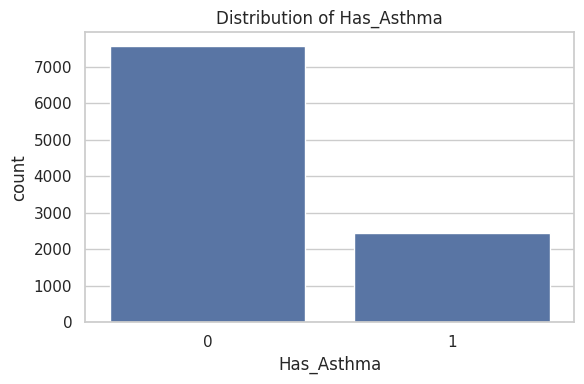

In [123]:
# Distribution of Has_Asthma
plt.figure(figsize = (6, 4))
sns.countplot(x = "Has_Asthma" , data = df)
plt.title("Distribution of Has_Asthma")
plt.tight_layout()


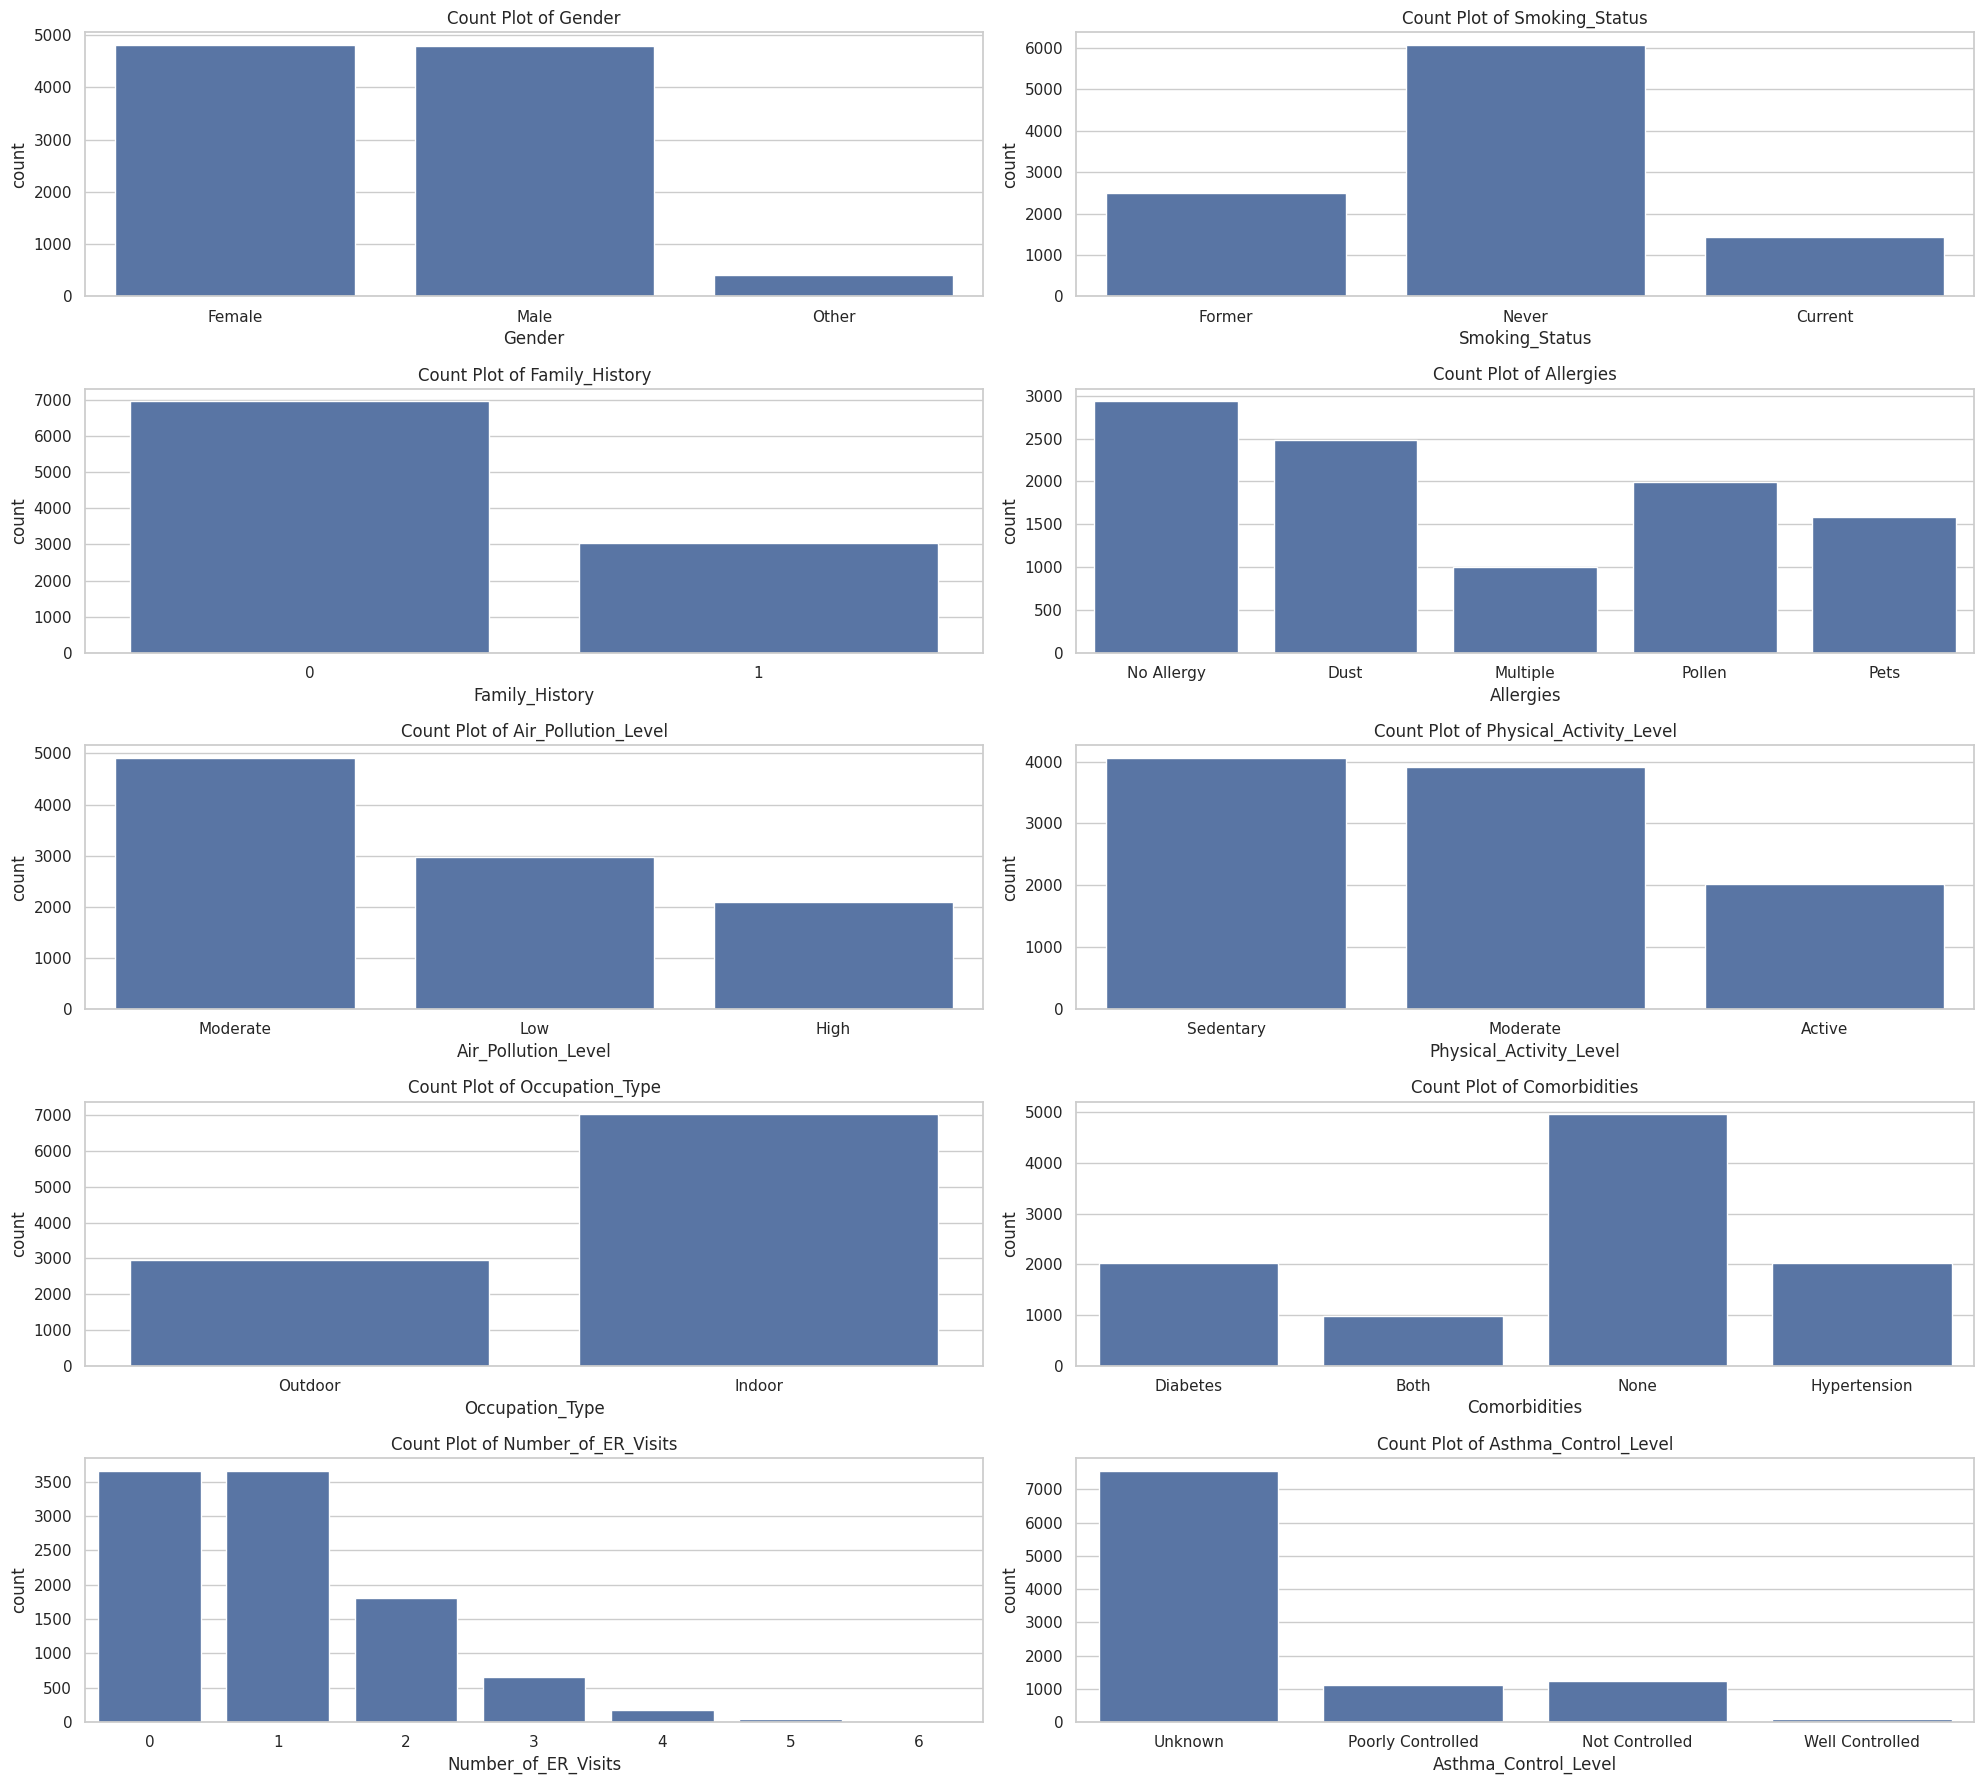

In [124]:
# categorical based plotting
categorical_columns = ["Gender" , "Smoking_Status", "Family_History" , "Allergies" , "Air_Pollution_Level" ,
                       "Physical_Activity_Level" , "Occupation_Type" , "Comorbidities" , "Number_of_ER_Visits" , "Asthma_Control_Level" ]
plt.figure(figsize = (20 , 18))
for  i , col in enumerate(categorical_columns , 1):
    plt.subplot(5 , 2, i)
    sns.countplot(x = col , data = df )
    plt.title(f"Count Plot of {col}")

plt.tight_layout()


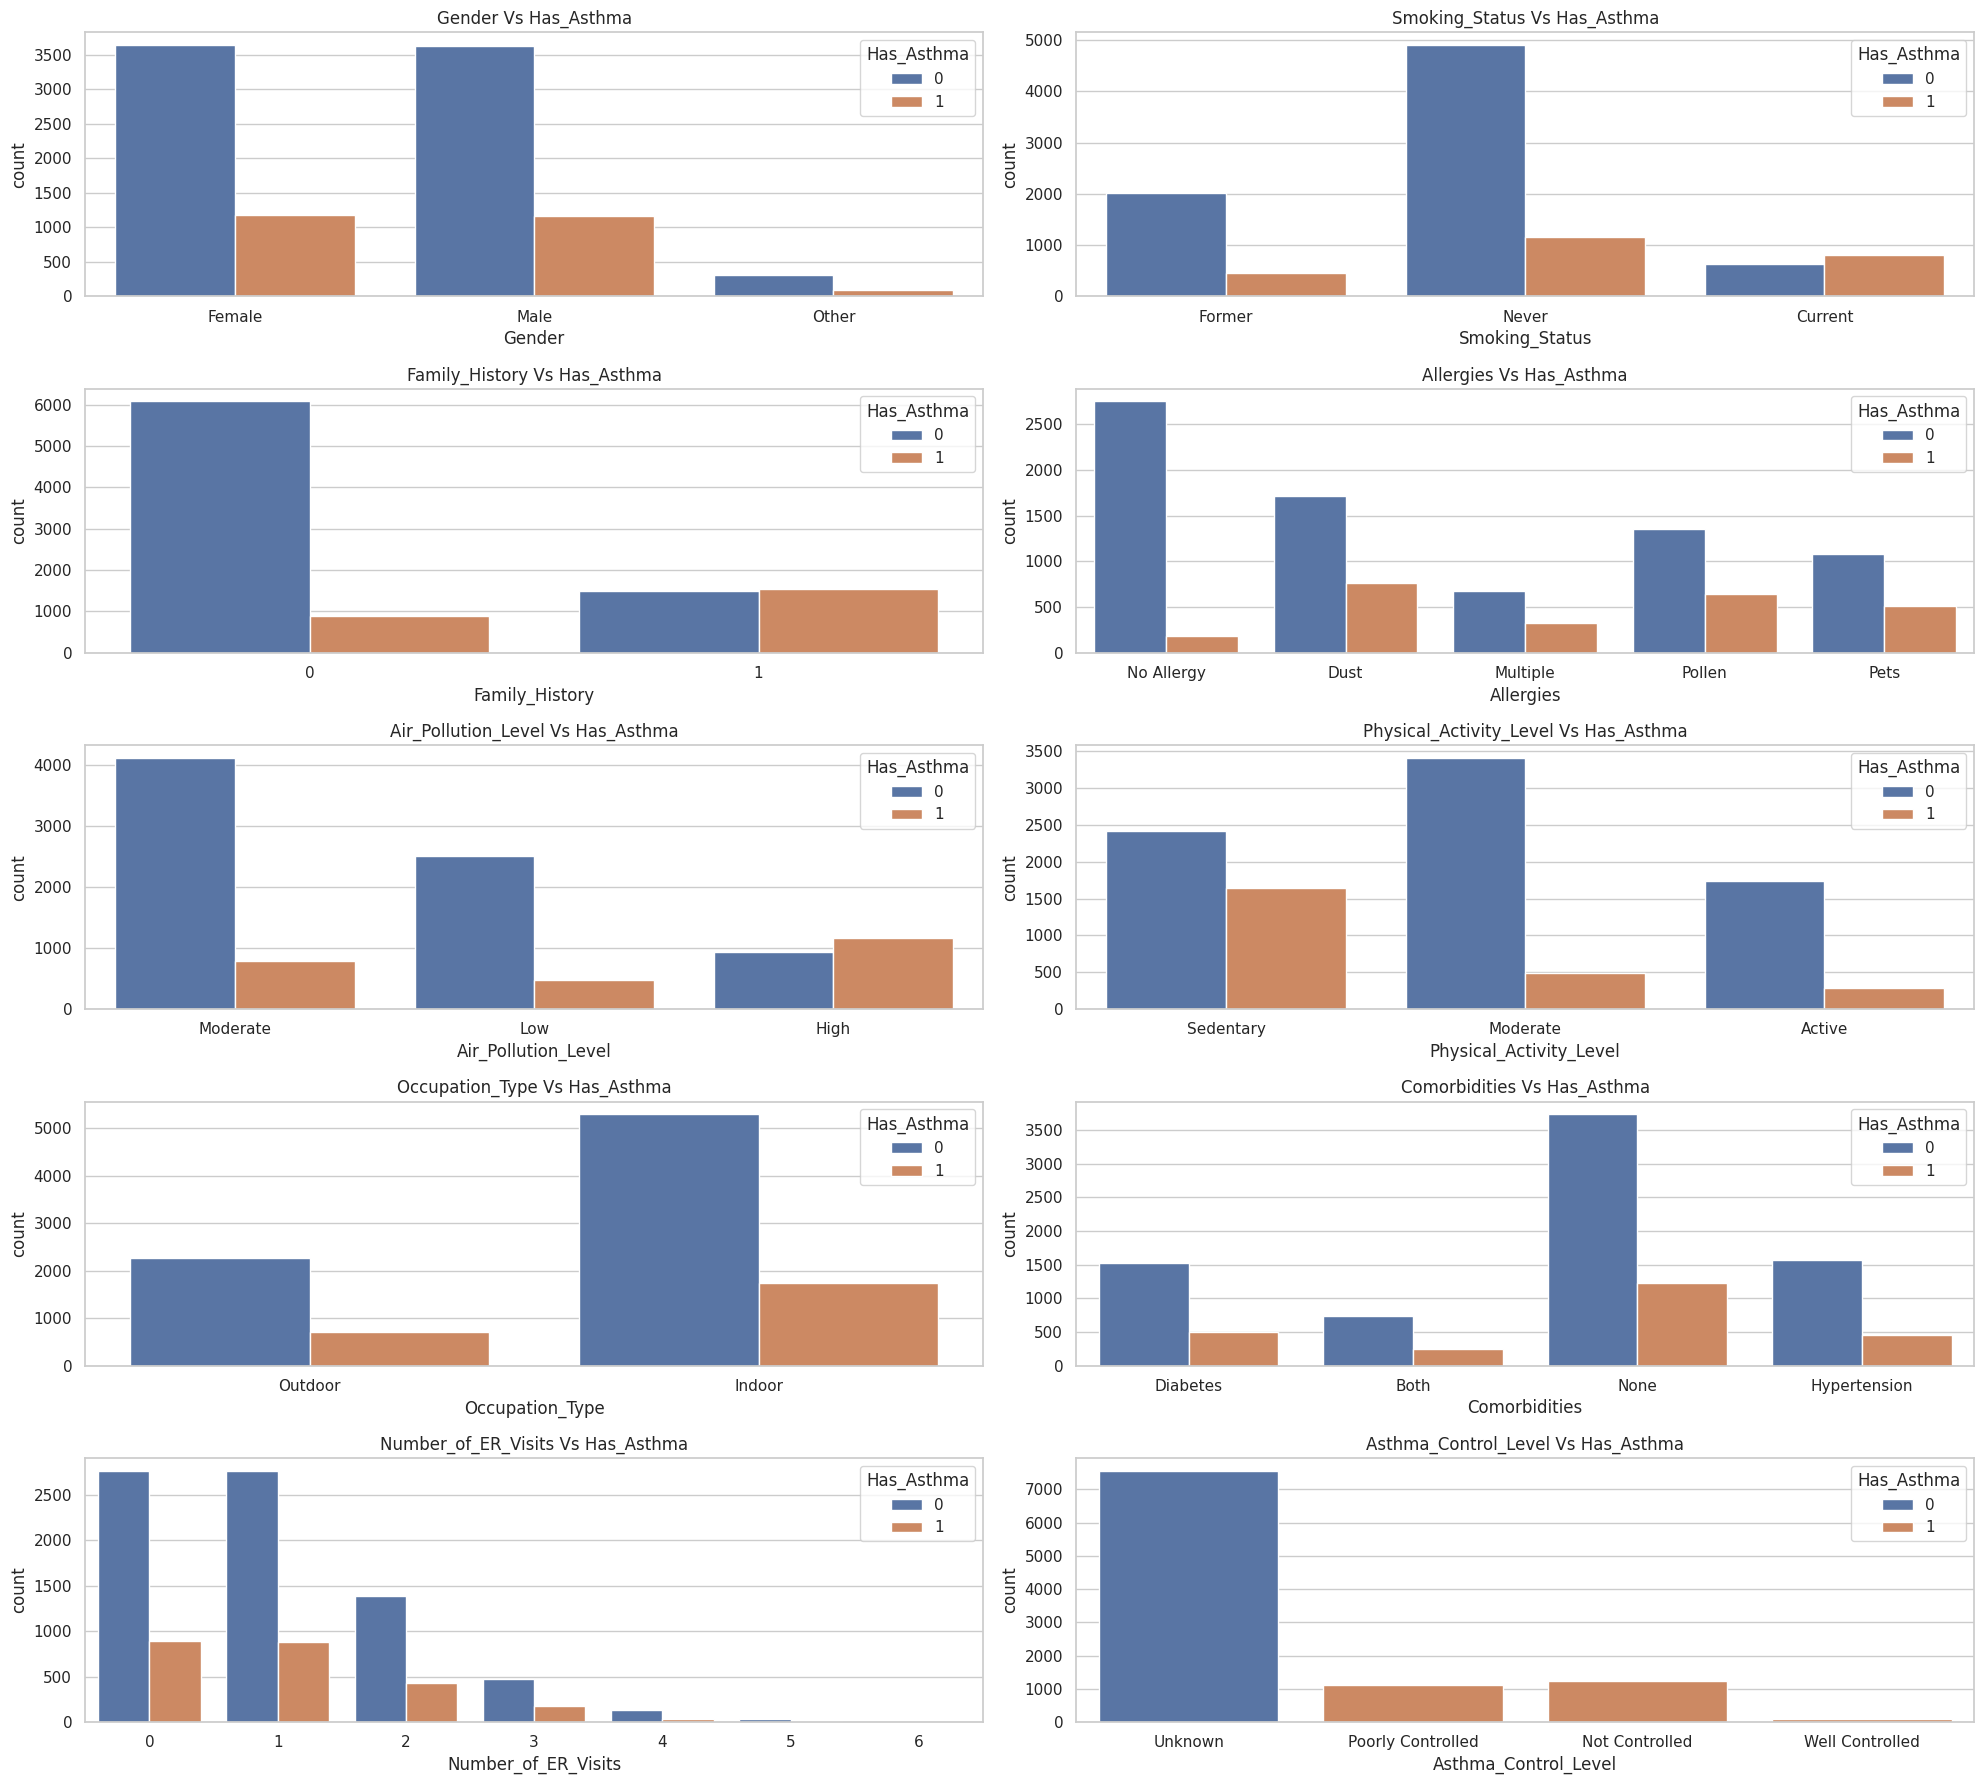

In [125]:
# categorical columns vs Has_Asthma
plt.figure(figsize = (20 , 18))

for i , col in enumerate(categorical_columns , 1):
    plt.subplot(5 , 2, i)
    sns.countplot(x = col , hue = "Has_Asthma" , data =df)
    plt.title(f"{col} Vs Has_Asthma")

plt.tight_layout()


#### 2) Numerical / Continues

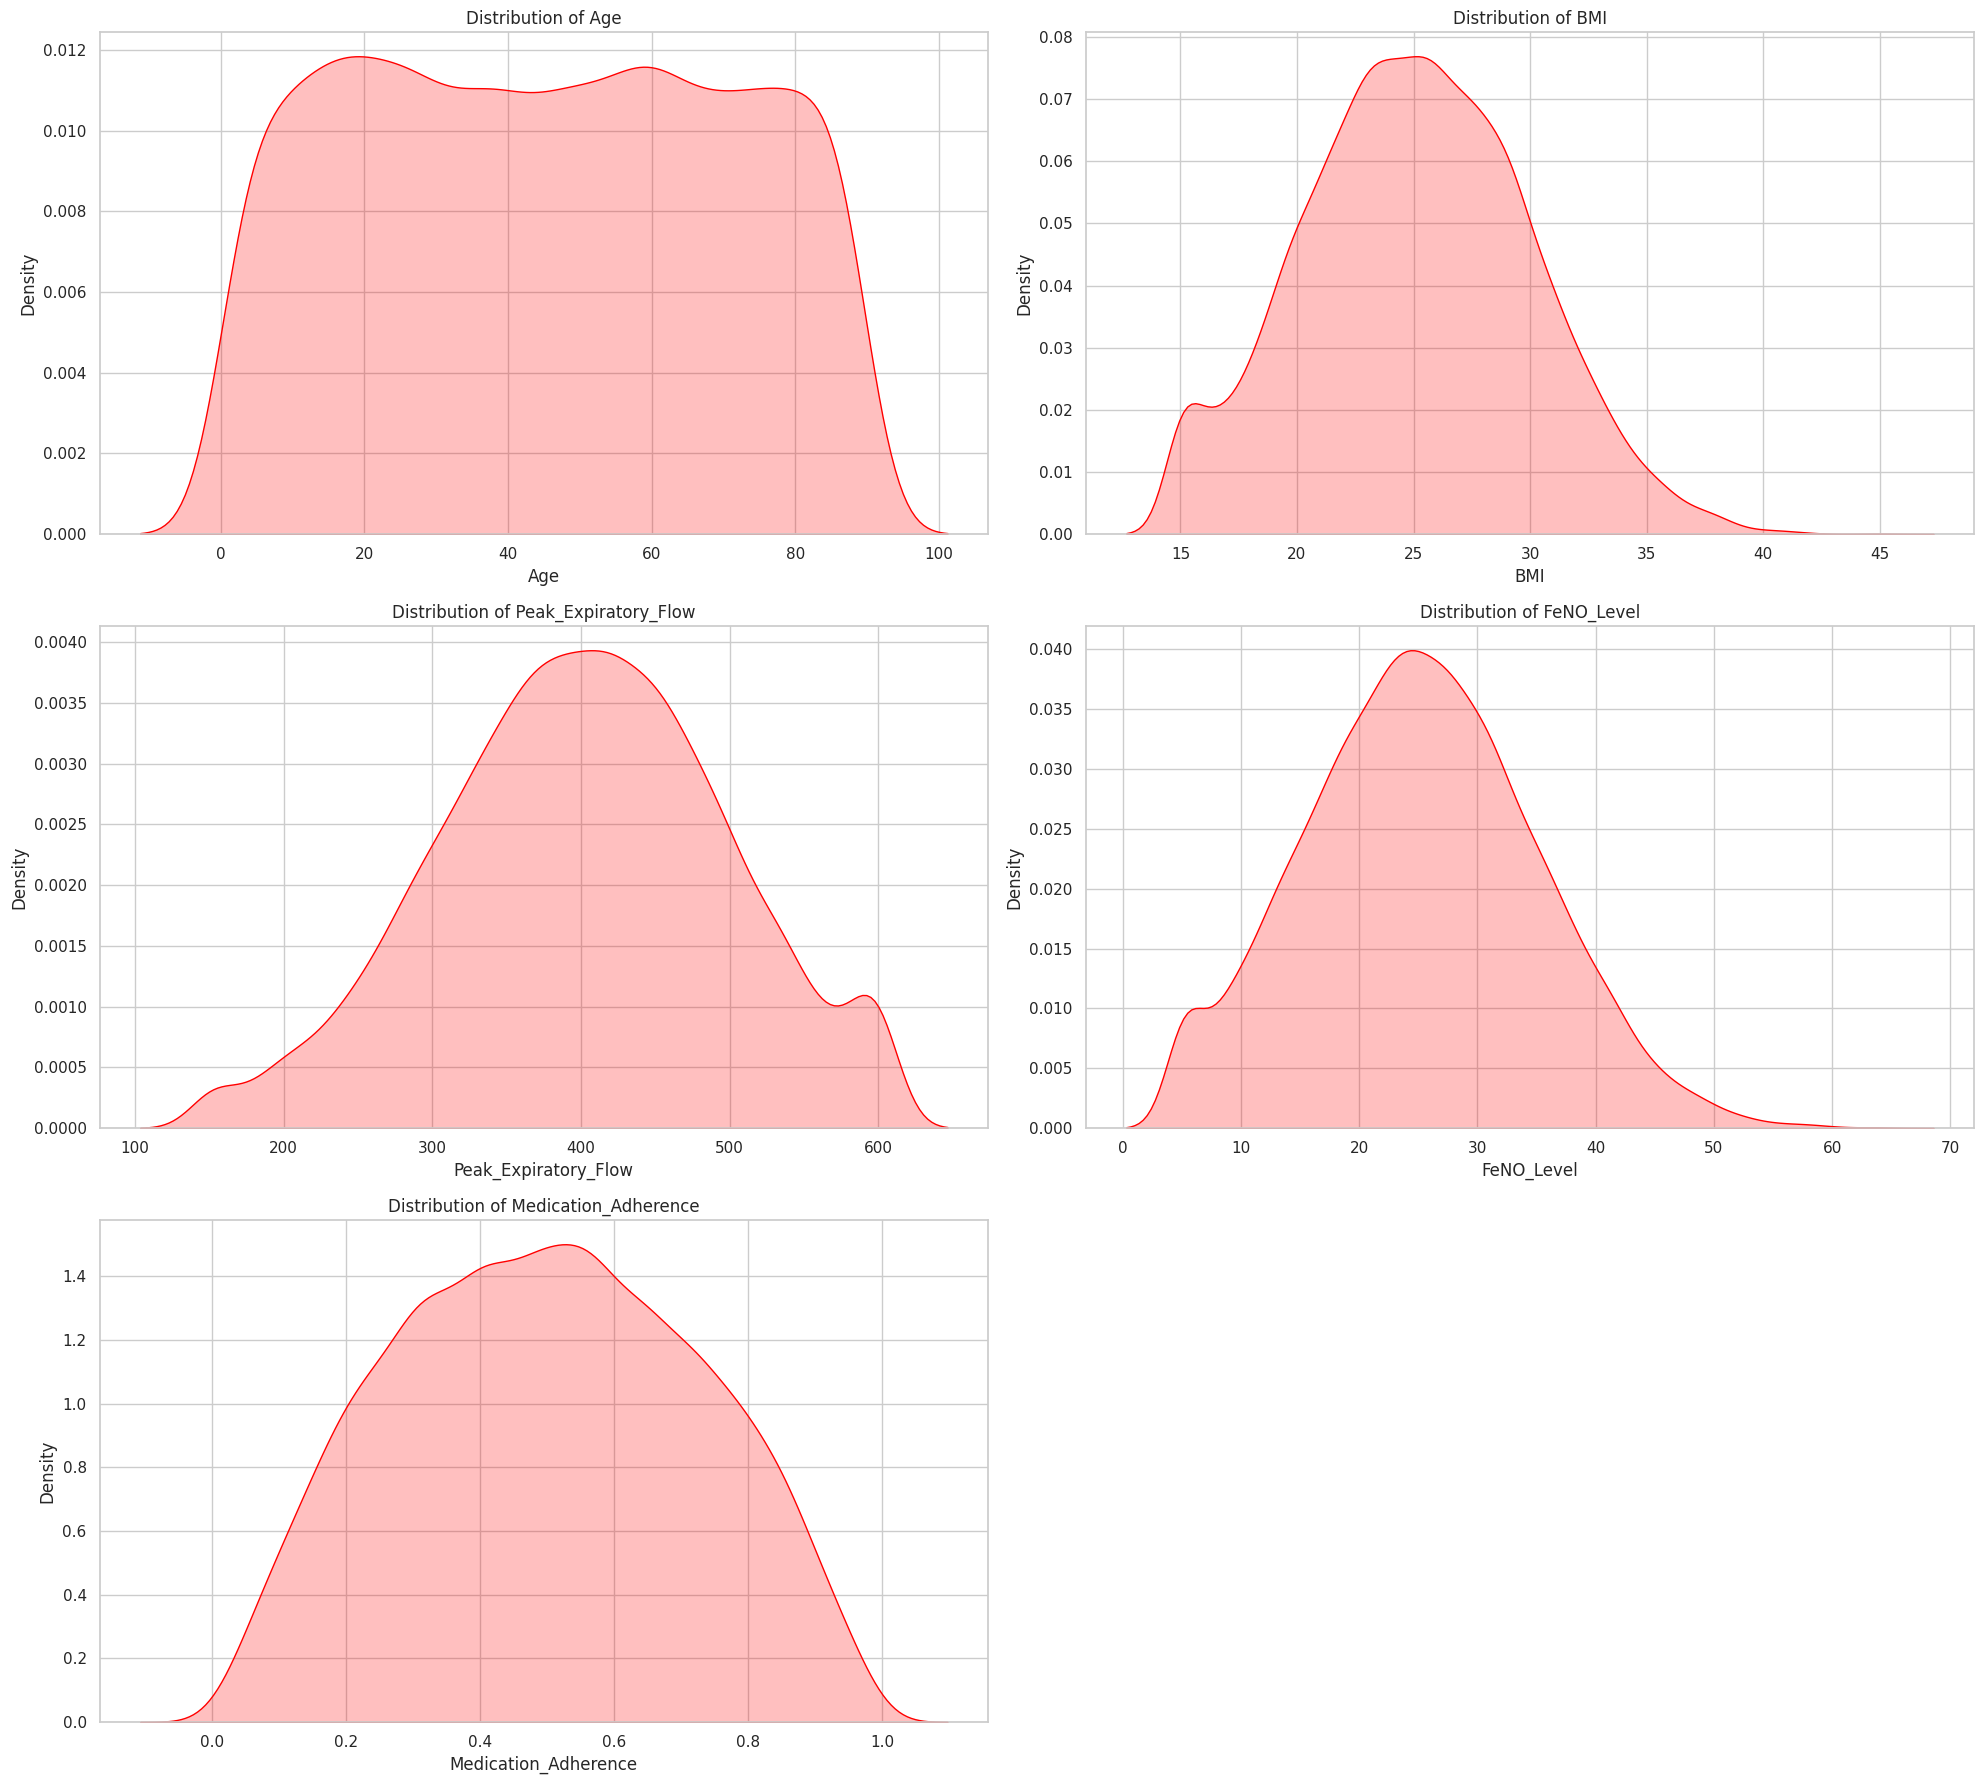

In [126]:
# continues based plotting
numerical_columns = ["Age", "BMI", "Peak_Expiratory_Flow", "FeNO_Level", "Medication_Adherence"]

plt.figure(figsize = (20 , 18))

for i,col in enumerate(numerical_columns , 1):
    plt.subplot(3, 2 , i)
    sns.kdeplot(x = col , shade = True ,  data = df , color = "Red")
    plt.title(f"Distribution of {col}")

plt.tight_layout()


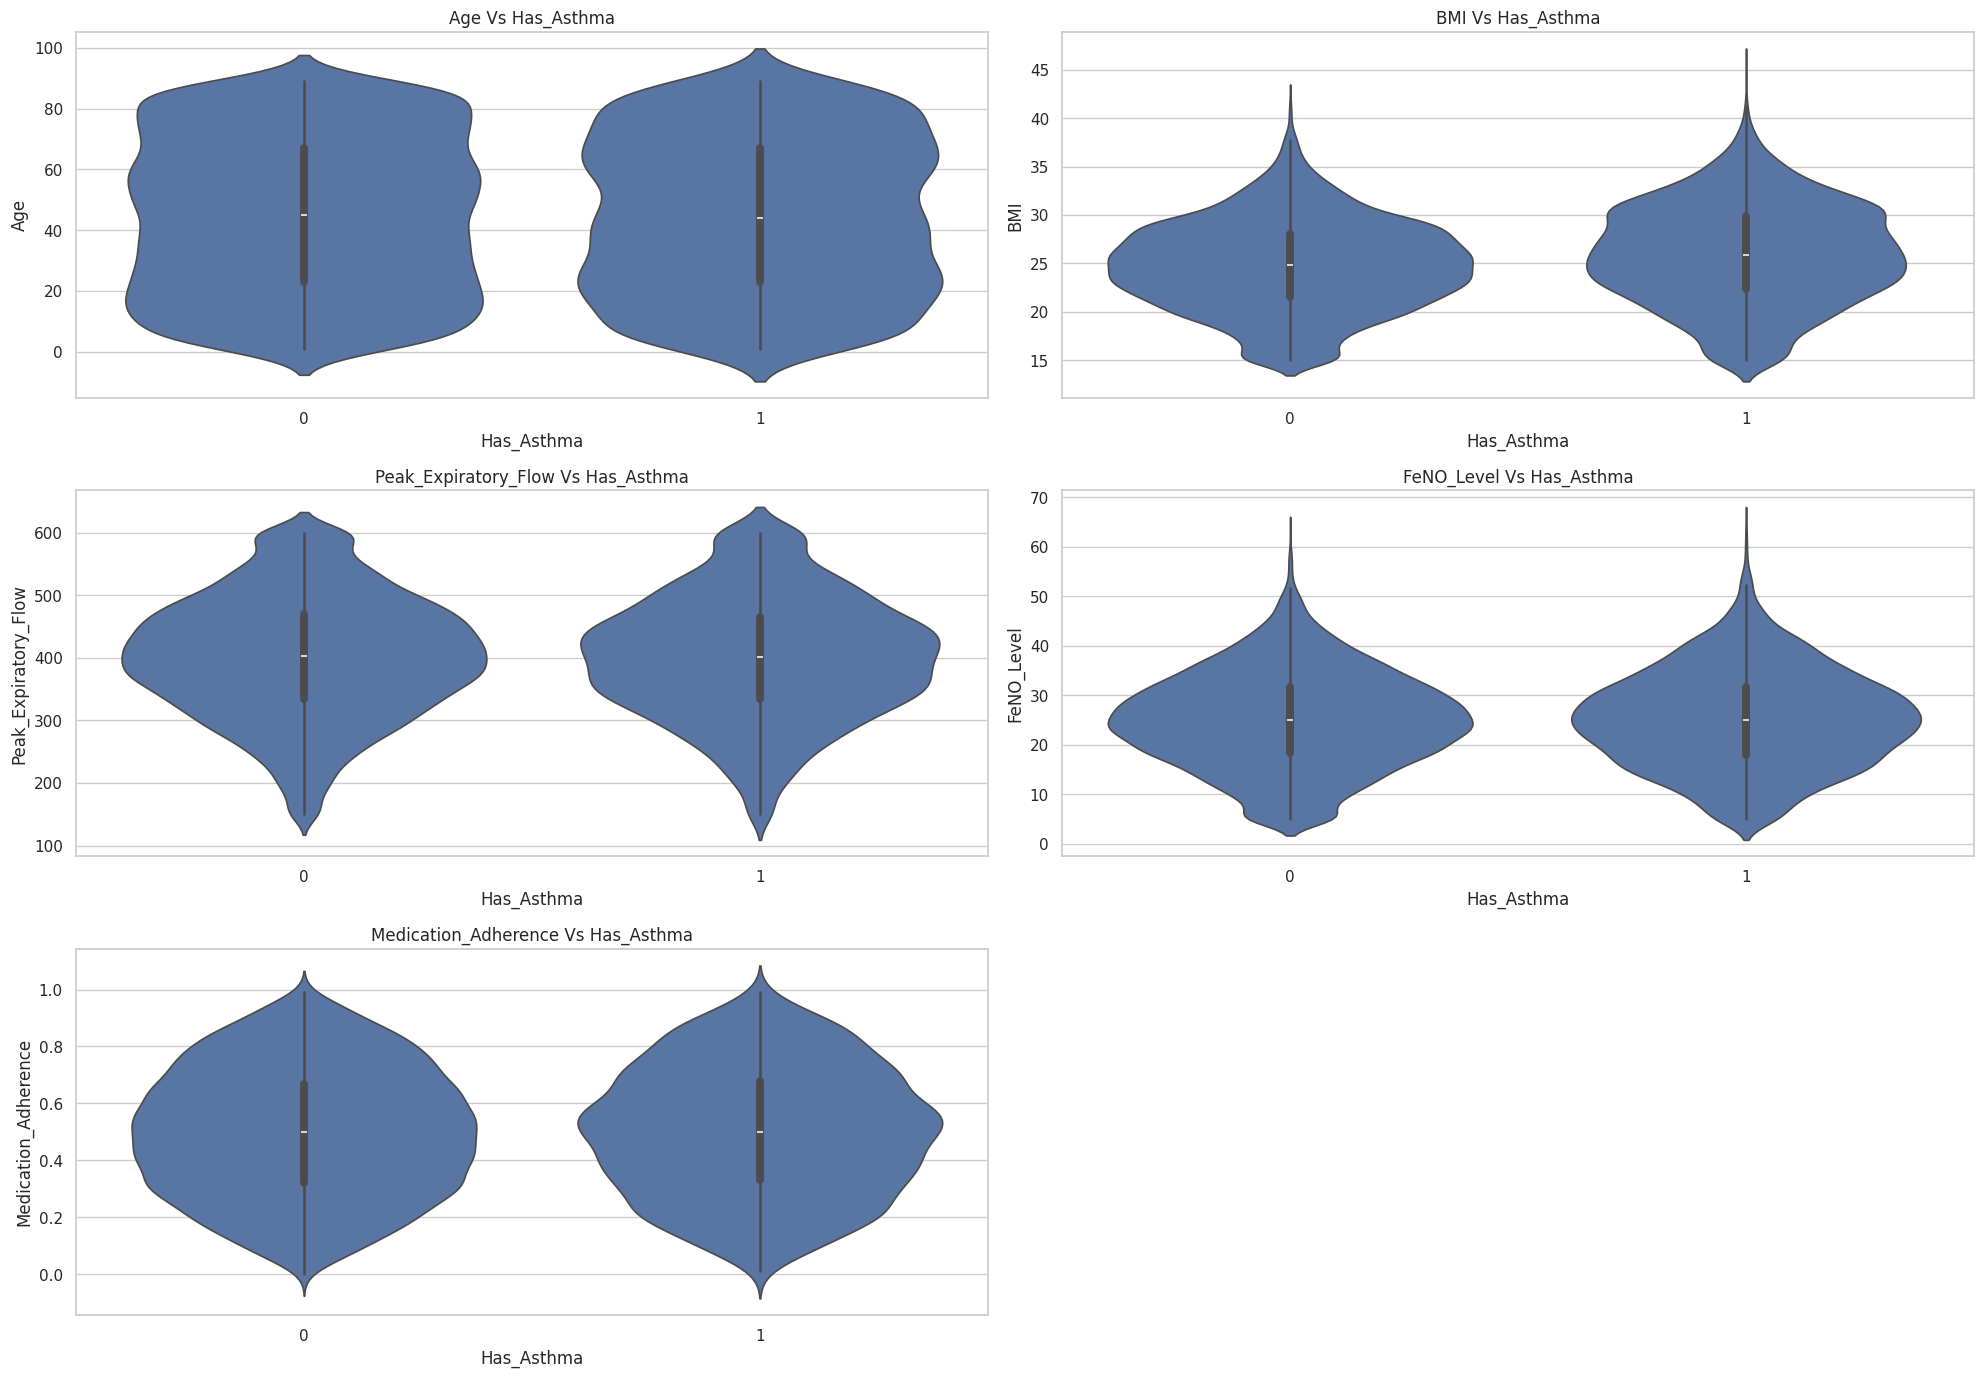

In [127]:
# Numerical Vs Has_Asthma

plt.figure(figsize = (20 , 18))

for i , col in enumerate(numerical_columns , 1):
    plt.subplot(4, 2 , i)
    sns.violinplot( x = "Has_Asthma", y = col  ,  data = df)
    plt.title(f"{col} Vs Has_Asthma")

plt.tight_layout()


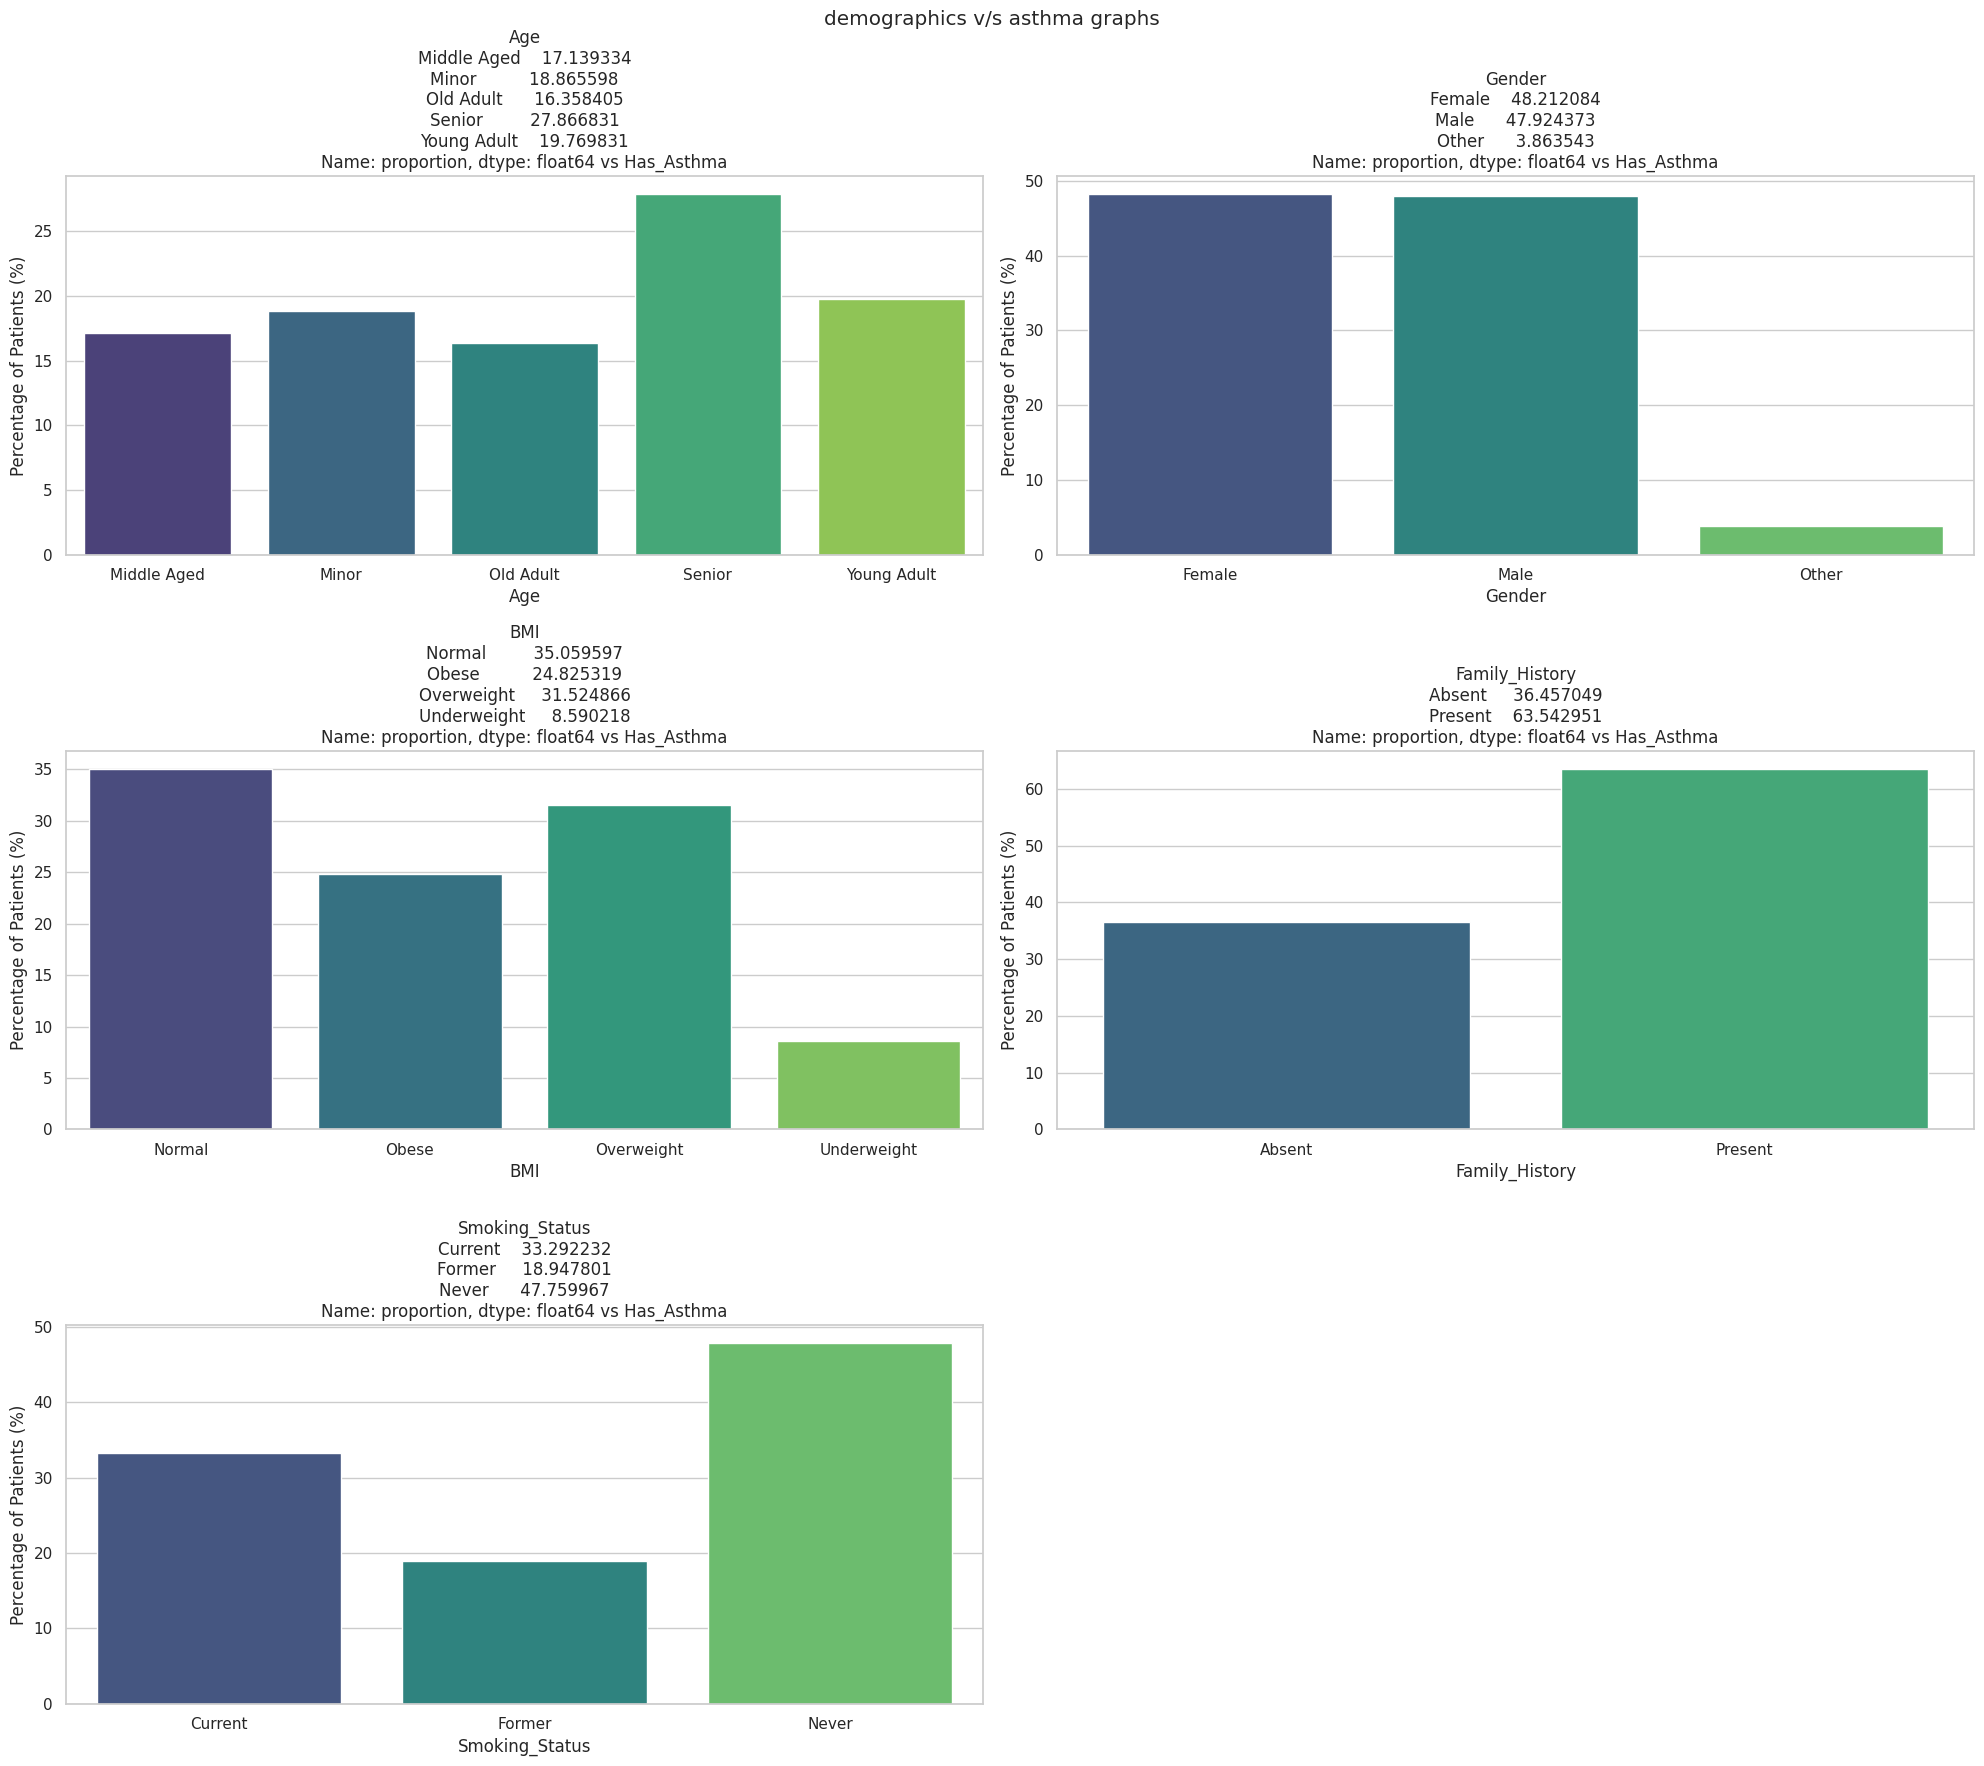

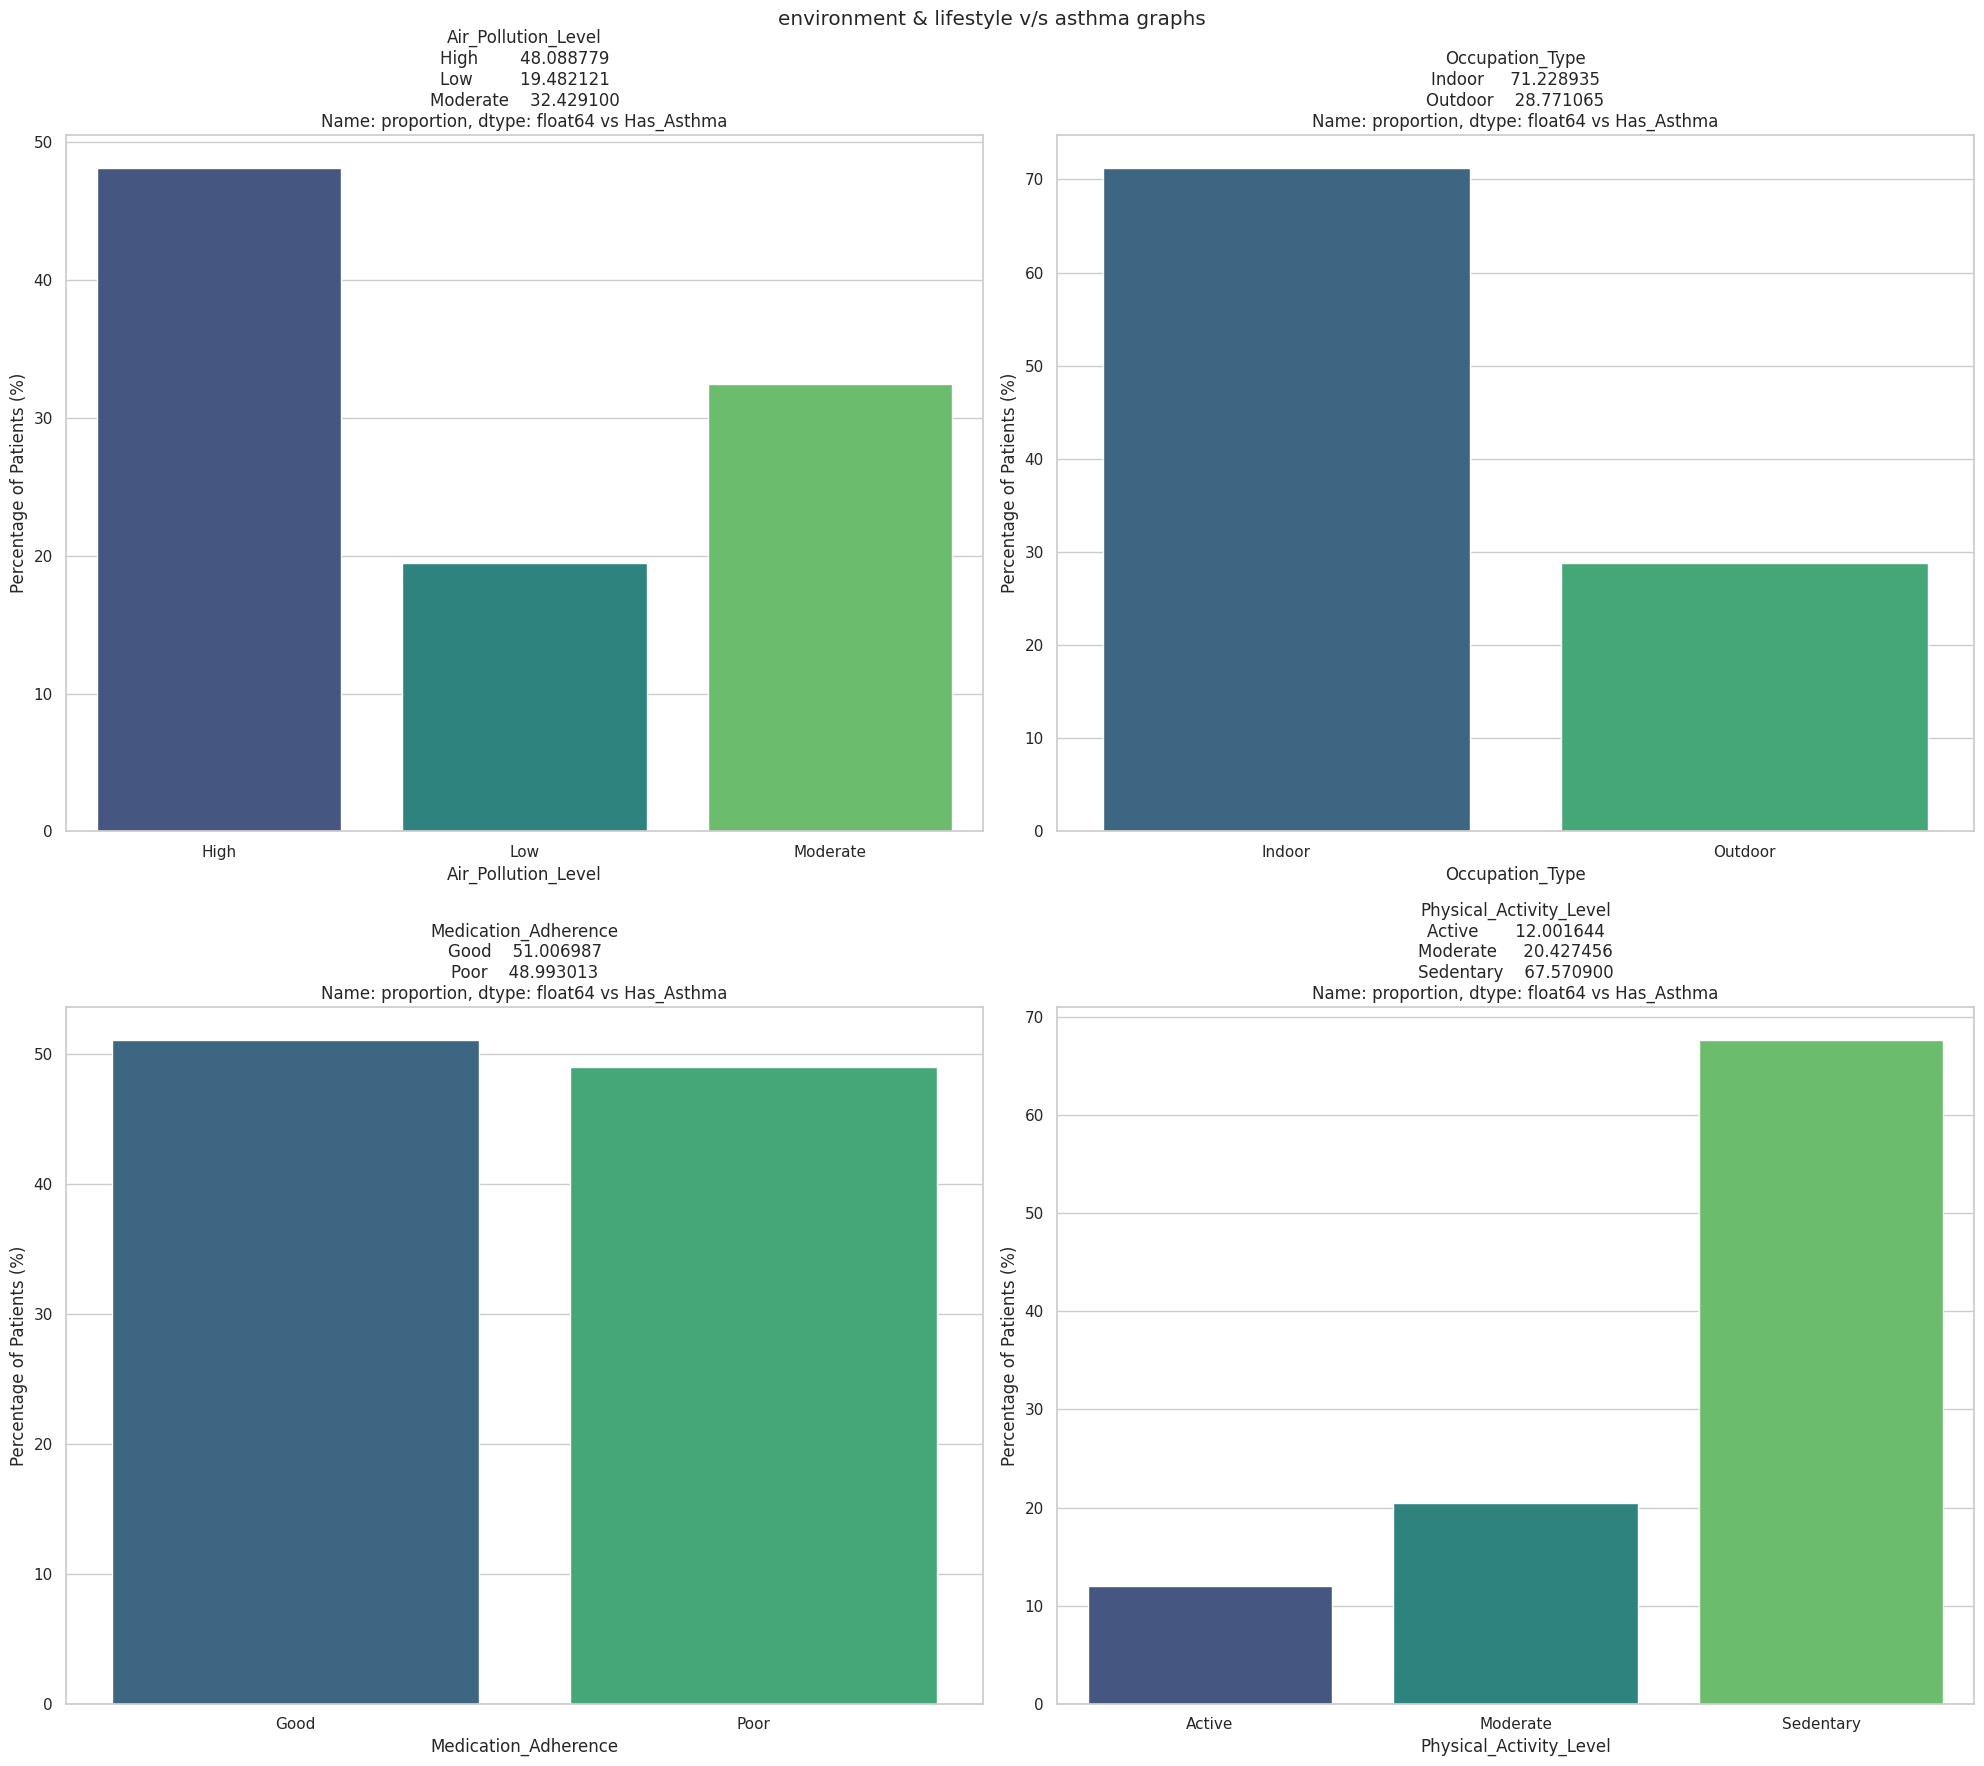

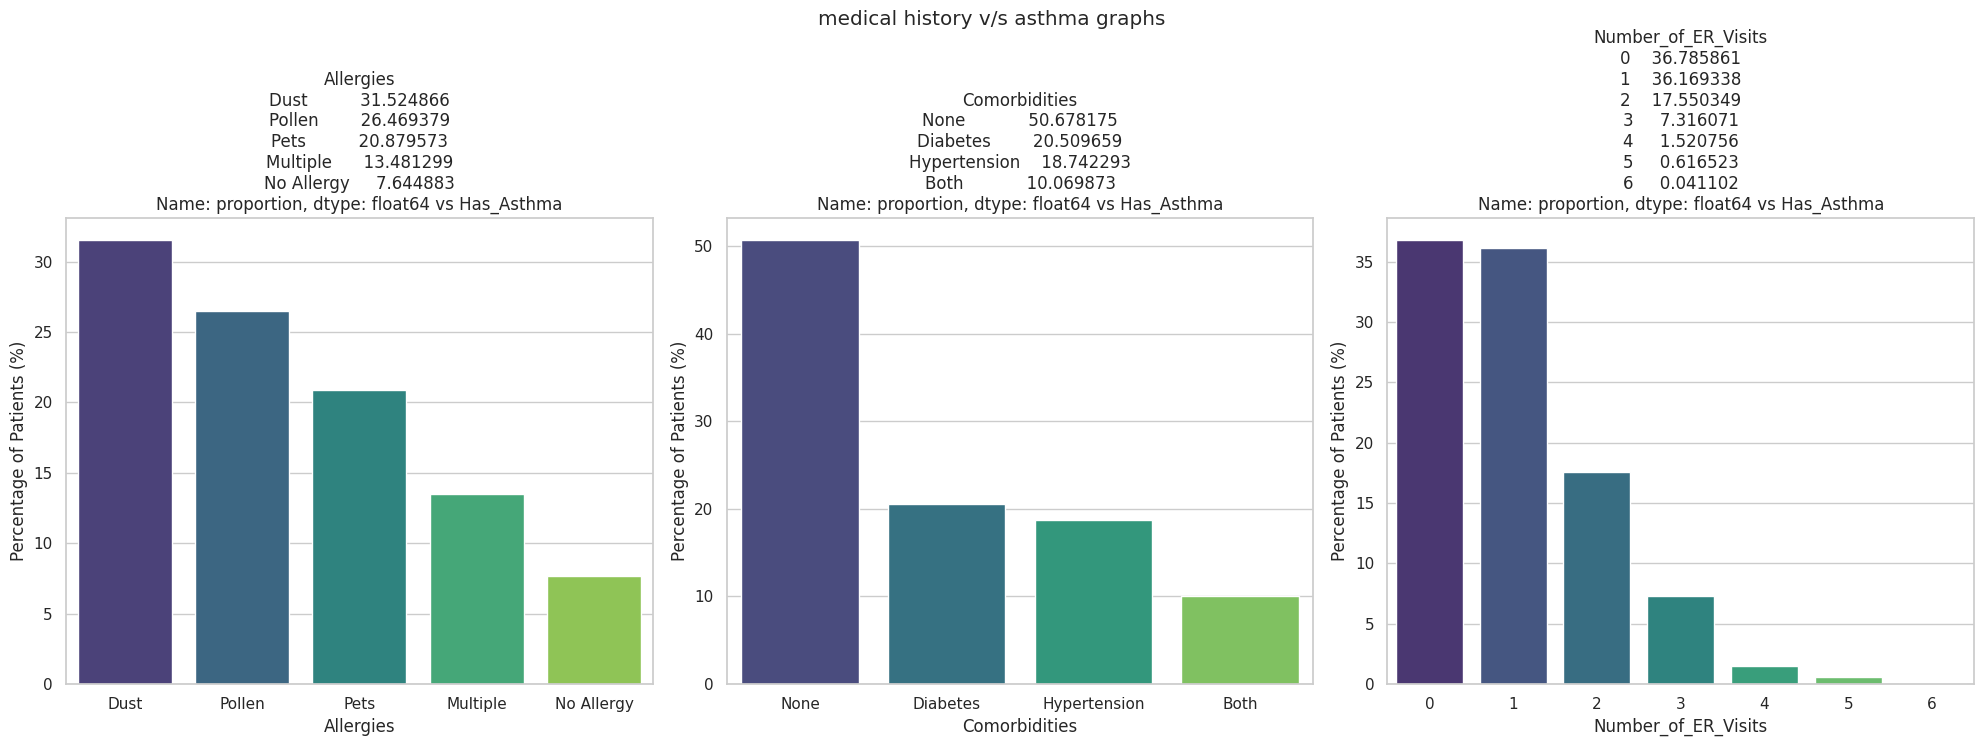

In [128]:
X = df.drop(columns = 'Asthma_Control_Level')
# X = df.drop(['Patient_ID'], axis=1)


X['Age'] = X['Age'].map(
    lambda x: "Minor" if x < 18 else
            "Young Adult" if x < 35 else
            "Middle Aged" if x < 50 else
            "Old Adult" if x < 65 else "Senior"
)
X['BMI'] = X['BMI'].map(
    lambda x: "Underweight" if x < 18.5 else
            "Normal" if x < 25 else
            "Overweight" if x < 30 else "Obese"
)
X['Medication_Adherence'] = X['Medication_Adherence'].map(
    lambda x: 'Poor' if x < 0.5 else 'Good'
)
X['Family_History'] = X['Family_History'].map(
    lambda x: 'Present' if x == 1 else 'Absent'
)

Xdv = X[X['Has_Asthma'] == 1]
# demographics v/s asthma patients

# calculating the distribution
age_counts = Xdv['Age'].value_counts(normalize=True).mul(100).sort_index()
gender_counts = Xdv['Gender'].value_counts(normalize=True).mul(100).sort_index()
bmi_counts = Xdv['BMI'].value_counts(normalize=True).mul(100).sort_index()
smoke_counts = Xdv['Smoking_Status'].value_counts(normalize=True).mul(100).sort_index()
family_counts = Xdv['Family_History'].value_counts(normalize=True).mul(100).sort_index()

cols = [age_counts, gender_counts, bmi_counts, family_counts, smoke_counts]

plt.figure(figsize = (20 , 18))
for  i , col in enumerate(cols , 1):
    plt.subplot(3 , 2, i)
    plt.ylabel('Percentage of Patients (%)')
    sns.barplot(x=col.index, y=col.values, palette='viridis')
    plt.title(f"{col} vs Has_Asthma")
    # print(col)

plt.suptitle(f"demographics v/s asthma graphs")
plt.tight_layout()
plt.savefig('environment_lifestyle_asthma.png')
plt.show()

# environment & lifestyle v/s asthma graphs

# calculating the distribution
pollution_counts = Xdv['Air_Pollution_Level'].value_counts(normalize=True).mul(100).sort_index()
occupation_counts = Xdv['Occupation_Type'].value_counts(normalize=True).mul(100).sort_index()
medication_adherence_counts = Xdv['Medication_Adherence'].value_counts(normalize=True).mul(100).sort_index()
activity_counts = Xdv['Physical_Activity_Level'].value_counts(normalize=True).mul(100).sort_index()

cols = [pollution_counts, occupation_counts, medication_adherence_counts, activity_counts]

plt.figure(figsize = (20 , 18))
for  i , col in enumerate(cols , 1):
    plt.subplot(2 , 2, i)
    plt.ylabel('Percentage of Patients (%)')
    sns.barplot(x=col.index, y=col.values, palette='viridis')
    plt.title(f"{col} vs Has_Asthma")
    # print(col)

plt.suptitle(f"environment & lifestyle v/s asthma graphs")
plt.tight_layout()
plt.savefig('environment_lifestyle_asthma.png')
plt.show()

# medical history v/s asthma graphs

# calculating the distribution
allergies_counts = Xdv['Allergies'].value_counts(normalize=True).mul(100)
comorbidity_counts = Xdv['Comorbidities'].value_counts(normalize=True).mul(100)
er_visit_counts = Xdv['Number_of_ER_Visits'].value_counts(normalize=True).mul(100).sort_index()

cols = [allergies_counts, comorbidity_counts, er_visit_counts]

plt.figure(figsize = (20 , 18))
for  i , col in enumerate(cols , 1):
    plt.subplot(3 , 3, i)
    plt.ylabel('Percentage of Patients (%)')
    sns.barplot(x=col.index, y=col.values, palette='viridis')
    plt.title(f"{col} vs Has_Asthma")
    # print(col)

plt.suptitle(f"medical history v/s asthma graphs")
plt.tight_layout()
plt.savefig('environment_lifestyle_asthma.png')
plt.show()

## Preprocessing

In [129]:
# The Asthma_Control_Level exists only for people who already have asthma.
# Using it in the model would leak future information:
# If you include Asthma_Control_Level as a feature to predict asthma, the model will cheat
df = df.drop("Asthma_Control_Level" , axis = 1)

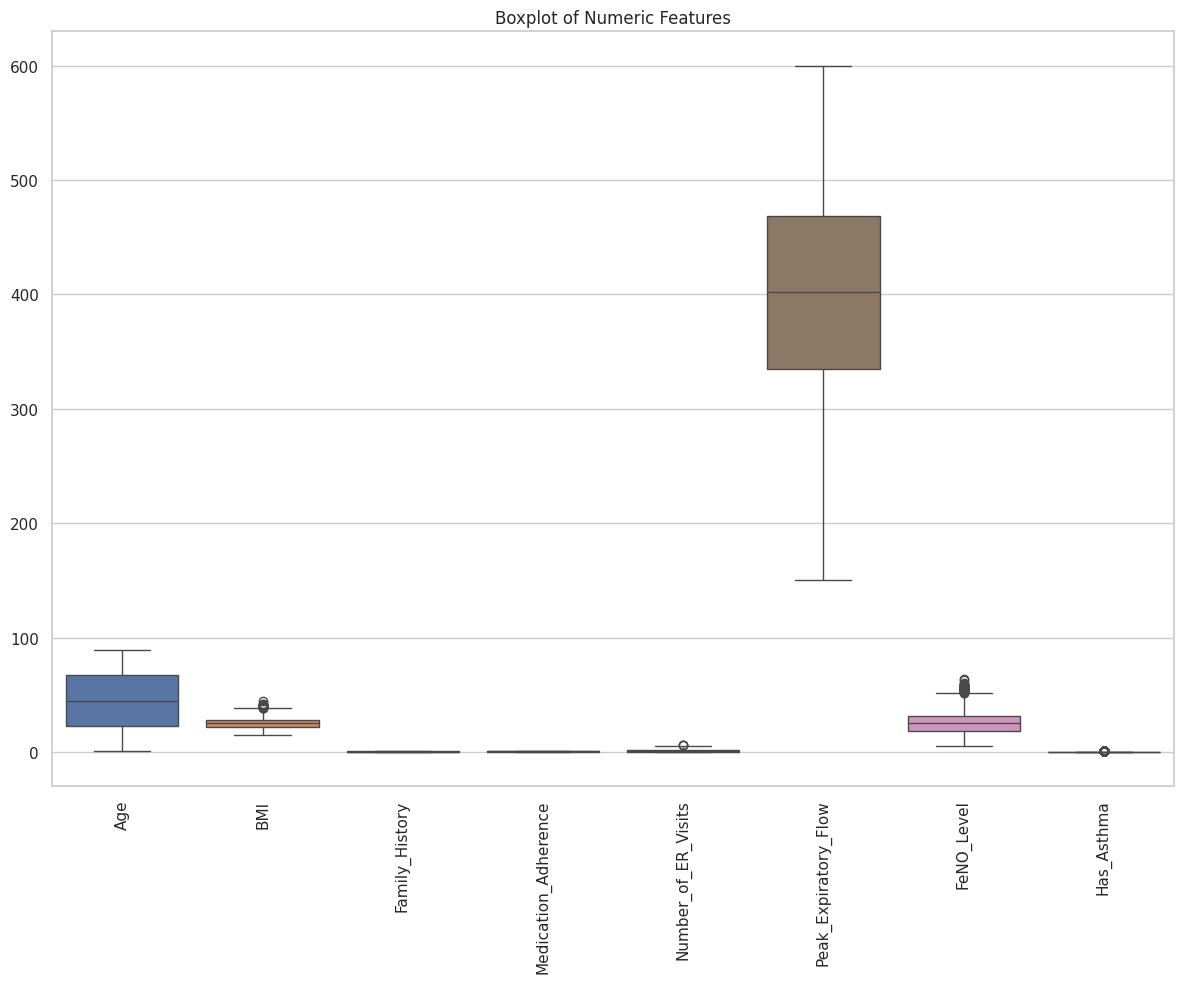

In [130]:
# Checking for Outliers
plt.figure(figsize = (12, 10 ))
sns.boxplot(data =  df.select_dtypes(include="number"))
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation = 90)
plt.tight_layout()


### Encoding values

In [131]:
cols = ["Gender" , "Smoking_Status" , "Allergies" , "Air_Pollution_Level" , "Physical_Activity_Level" , "Occupation_Type" , "Comorbidities" ]
for col in cols :
    print(df[col].value_counts())
    print("------------")

Gender
Female    4814
Male      4786
Other      400
Name: count, dtype: int64
------------
Smoking_Status
Never      6070
Former     2487
Current    1443
Name: count, dtype: int64
------------
Allergies
No Allergy    2936
Dust          2479
Pollen        1999
Pets          1585
Multiple      1001
Name: count, dtype: int64
------------
Air_Pollution_Level
Moderate    4915
Low         2984
High        2101
Name: count, dtype: int64
------------
Physical_Activity_Level
Sedentary    4062
Moderate     3909
Active       2029
Name: count, dtype: int64
------------
Occupation_Type
Indoor     7035
Outdoor    2965
Name: count, dtype: int64
------------
Comorbidities
None            4967
Diabetes        2029
Hypertension    2018
Both             986
Name: count, dtype: int64
------------


In [132]:
# Gender
df["Gender"] = df["Gender"].map({
    "Female":0 ,
    "Male":1 ,
    "Other":2
})

# Smoking_Status
df["Smoking_Status"] = df["Smoking_Status"].map({
    "Never":0 ,
    "Former":1 ,
    "Current":2
})

# Allergies
df["Allergies"] = df["Allergies"].map({
    "No Allergy":0,
    "Dust":1,
    "Pollen":1,
    "Pets":1,
    "Multiple":2
})

# Air_Pollution_Level
df["Air_Pollution_Level"] = df["Air_Pollution_Level"].map({
    "Low":0,
    "Moderate":1,
    "High":2
})

# Physical_Activity_Level
df["Physical_Activity_Level"] = df["Physical_Activity_Level"].map({
    "Active":0,
    "Moderate":1,
    "Sedentary":2
})

# Occupation_Type
df["Occupation_Type"] = df["Occupation_Type"].map({
    "Outdoor":0,
    "Indoor":1
})


# Comorbidities
df["Comorbidities"] = df["Comorbidities"].map({
    "None":0,
    "Diabetes":1,
    "Hypertension":1,
    "Both":2
})

In [133]:
df.head()

,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
0,52,0,27.6,1,1,0,1,2,0,1,0.38,0,421.0,46.0,0
1,15,1,24.6,1,0,1,0,1,1,2,0.60,2,297.6,22.9,0
2,72,0,17.6,0,0,0,1,1,1,0,0.38,0,303.3,15.3,0
3,61,1,16.8,0,0,2,2,2,0,2,0.60,1,438.0,40.1,1
4,21,1,30.2,0,0,0,1,0,1,0,0.82,3,535.0,27.7,0


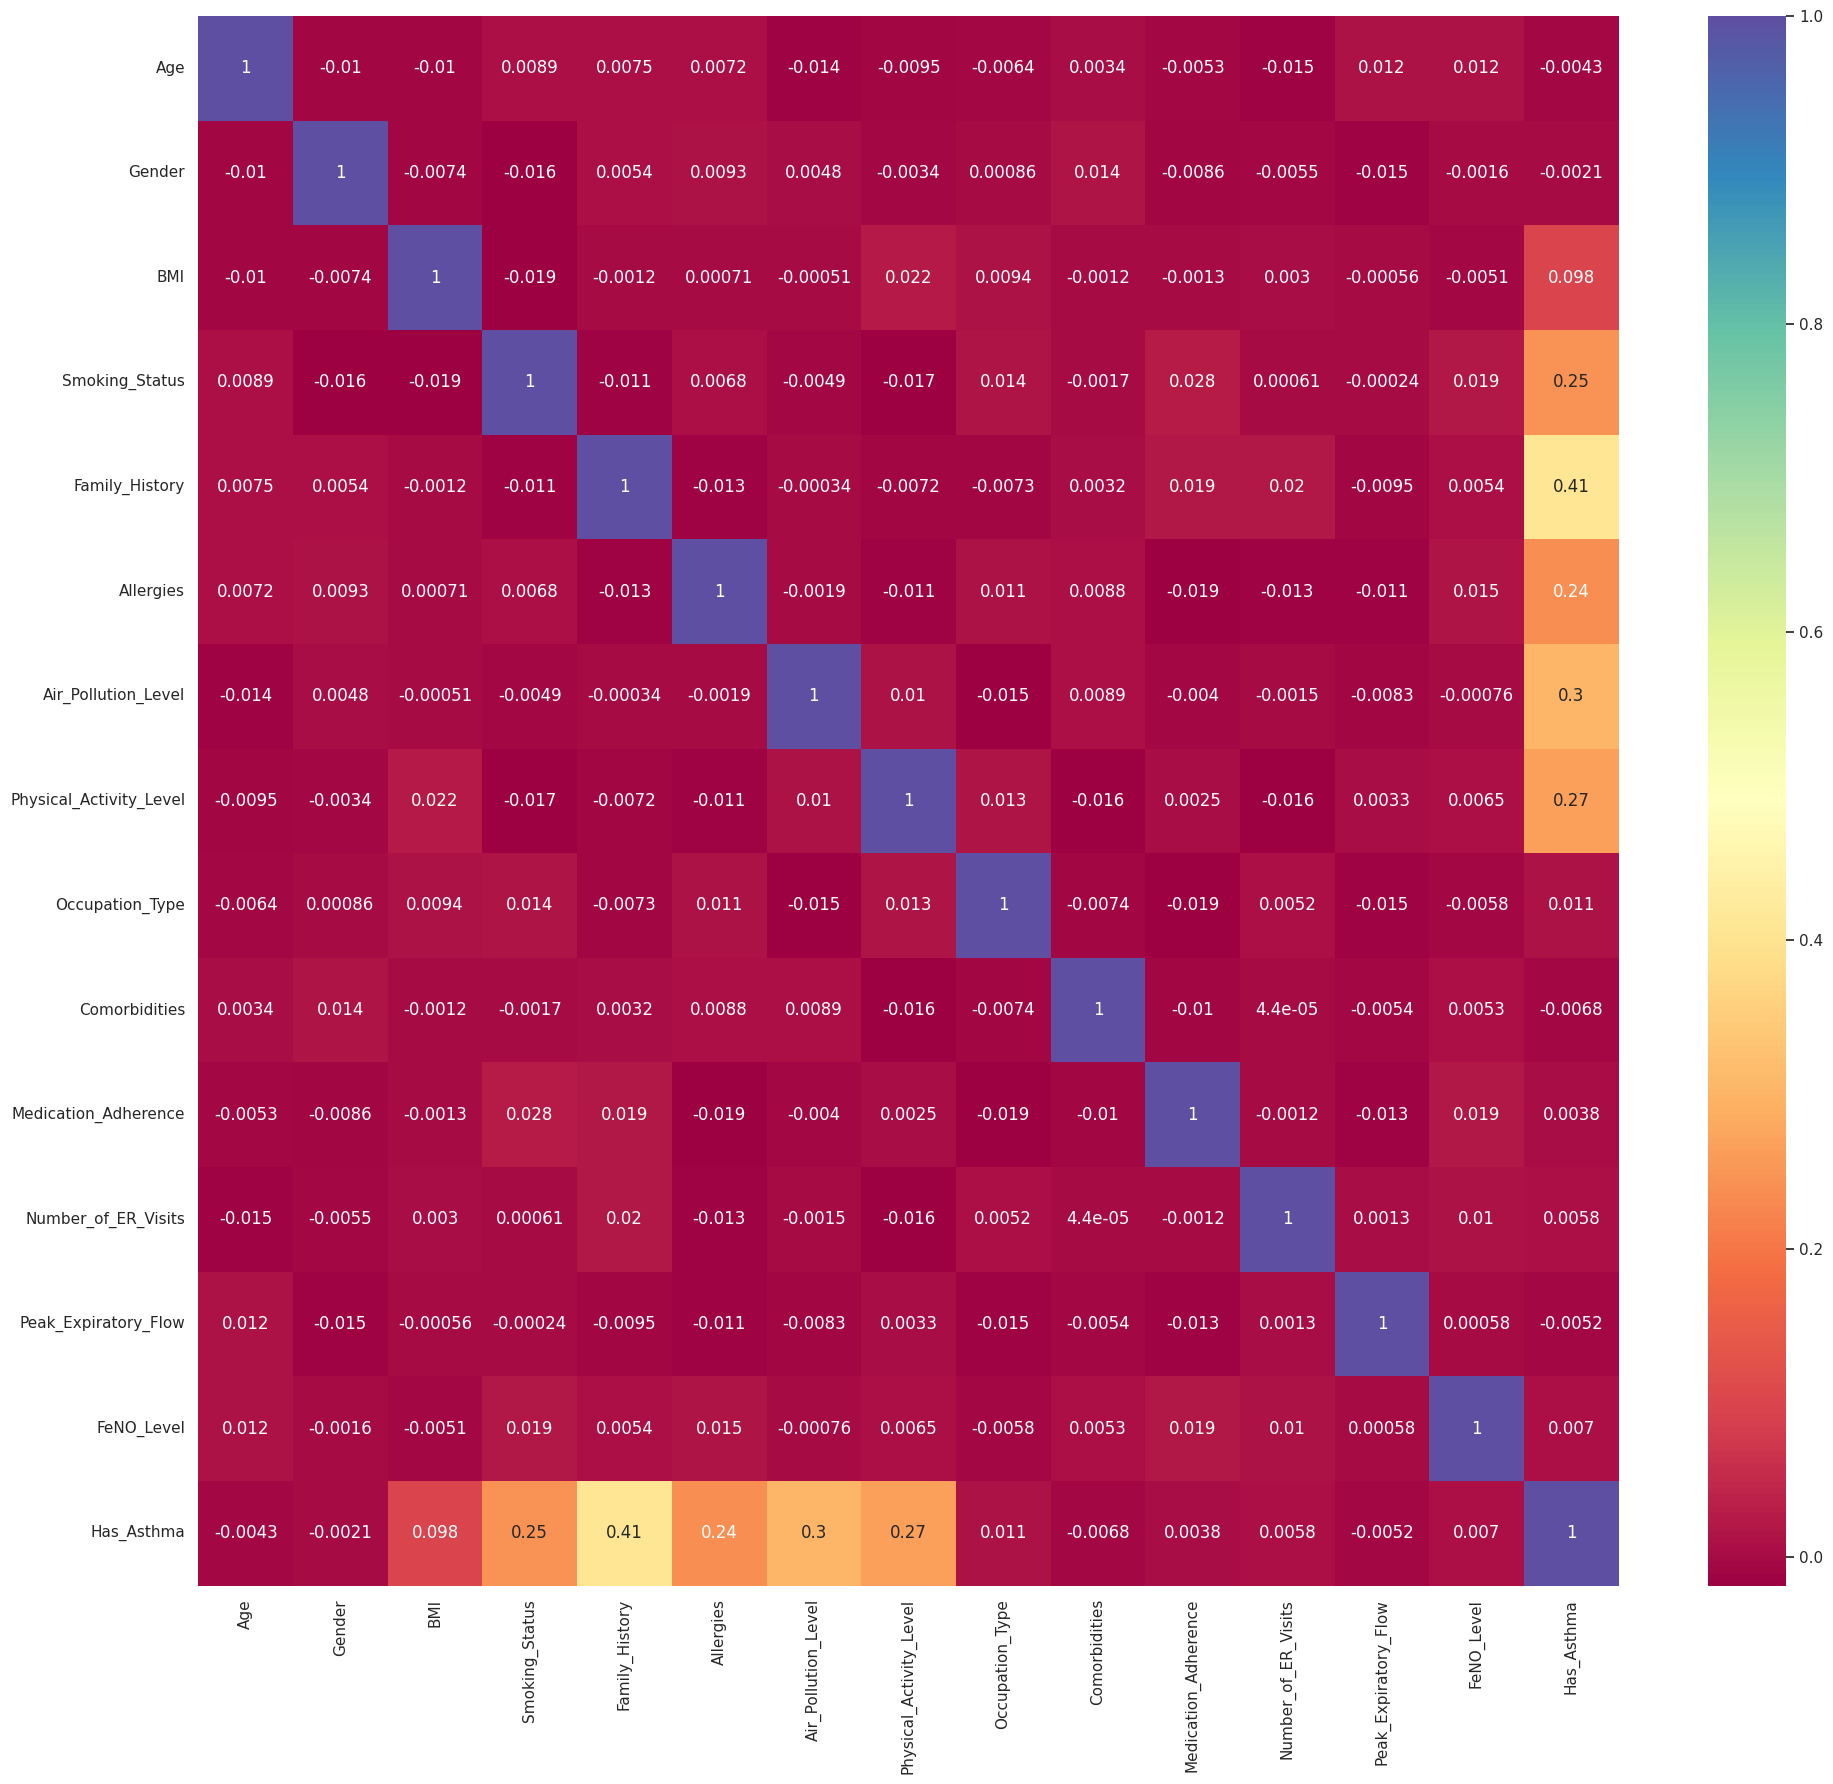

In [134]:
# correlation matrix

plt.figure(figsize = (20, 18))
sns.heatmap(df.corr() , annot = True , cmap = "Spectral")
plt.tight_layout()

## Spliting : Train , Test

In [135]:
# Spliting TRAIN , VALID  , TEST
# 60 % , 20% , 20%
label_train , label_valid , label_test  = np.split(df.sample(frac = 1) , [int(0.6 * len(df)) , int(0.8 * len(df))])

# X,y
X_train , y_train = label_train.iloc[: , :-1 ] , label_train.iloc[: , -1]
X_valid , y_valid = label_valid.iloc[: , :-1 ] , label_valid.iloc[: , -1]
X_test , y_test = label_test.iloc[: , :-1 ] , label_test.iloc[: , -1]

In [136]:
print("X shape:" , X.shape)
print("X_train shape:" , X_train.shape)
print("X_test shape:" , X_test.shape)
print("-------------")
print("y shape:",y.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X shape: (10000, 15)
X_train shape: (6000, 14)
X_test shape: (2000, 14)
-------------
y shape: (10000,)
y_train shape: (6000,)
y_test shape: (2000,)


### Models:

#### 1) **LogisticRegression**

In [137]:
# model and fitting
lr_model = LogisticRegression()
lr_model.fit(X_train , y_train)

LogisticRegression()

In [138]:
# prediction
y_pred = lr_model.predict(X_test)
print("Accuracy Score : " , metrics.accuracy_score(y_test , y_pred))

Accuracy Score :  0.8675


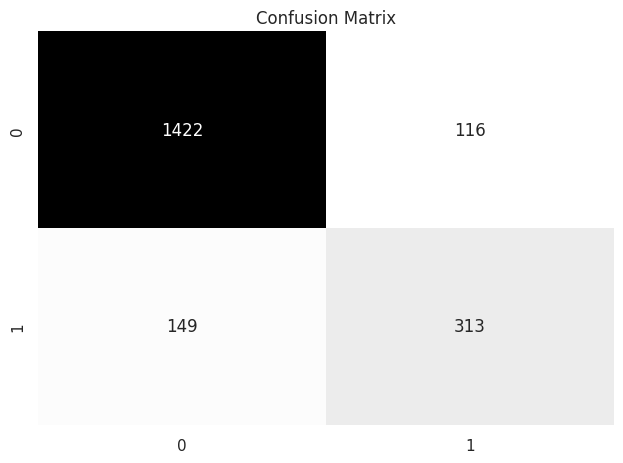

In [139]:
# consfusion matrix
cfn_matrix = metrics.confusion_matrix(y_test , y_pred)
sns.heatmap(cfn_matrix , annot = True , fmt= "d",cmap = "Greys" , cbar = False)
plt.title("Confusion Matrix")
plt.tight_layout()

In [140]:
# Classification Report
print("Classification Report : ")
print(metrics.classification_report(y_test , y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1538
           1       0.73      0.68      0.70       462

    accuracy                           0.87      2000
   macro avg       0.82      0.80      0.81      2000
weighted avg       0.86      0.87      0.87      2000



#### 2) **RandomForestClassifier**

In [141]:
# model and fitting
rf_model = RandomForestClassifier()
rf_model.fit(X_train , y_train)

RandomForestClassifier()

In [142]:
# accuracy score
y_pred = rf_model.predict(X_test)
print("Accuracy Score : " , metrics.accuracy_score(y_test , y_pred))

Accuracy Score :  0.9985


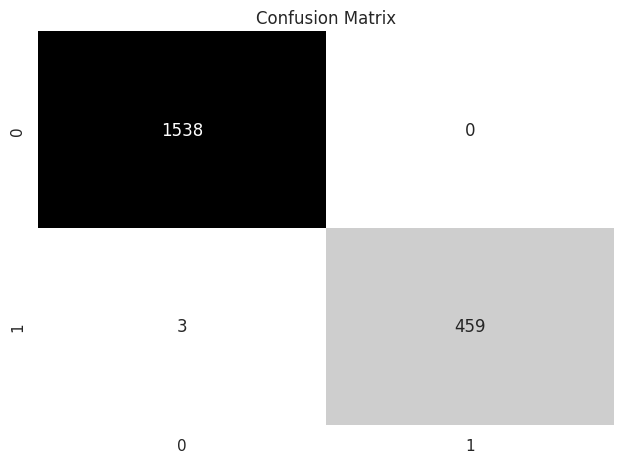

In [143]:
# consfusion matrix
cfn_matrix = metrics.confusion_matrix(y_test , y_pred)
sns.heatmap(cfn_matrix , annot = True , fmt= "d",cmap = "Greys" , cbar = False)
plt.title("Confusion Matrix")
plt.tight_layout()

In [144]:
# Classification Report
print("Classification Report : ")
print(metrics.classification_report(y_test , y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1538
           1       1.00      0.99      1.00       462

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



## Neural Network

In [146]:
# # Standardizing
# sc = StandardScaler()

# train_X = sc.fit_transform(X_train)
# valid_X = sc.fit_transform(X_valid)
# test_X = sc.transform(X_test)

In [147]:
# History Plot
def plot_history(history):
  fig , (ax1 , ax2) = plt.subplots(1 , 2 , figsize = (10 , 4))
  ax1.plot(history.history["loss"] , color = "red" , label = "Training Loss")
  ax1.plot(history.history["val_loss"], color = "green" , label = "Validation Loss")
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Loss")
  ax1.legend()

  ax2.plot(history.history['accuracy'],color = "red" , label='Training Accuracy')
  ax2.plot(history.history["val_accuracy"] , color = "green" , label = "Validation Accuracy")
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("Accuracy")
  ax2.legend()

  plt.tight_layout()
  plt.show()


In [178]:
# Model selection
def model_selection(units , batch_size , epoch = 100):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units , input_shape =(14,) , activation ='relu'),
    tf.keras.layers.Dense(1 , activation = "sigmoid")
  ])

  nn_model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics = ["accuracy"])

  history = nn_model.fit(X_train , y_train , epochs = epochs  , batch_size = batch_size , validation_data = (X_valid , y_valid) , verbose = 0)

  return nn_model , history

Units: 4, Batch Size: 16, Epochs: 100


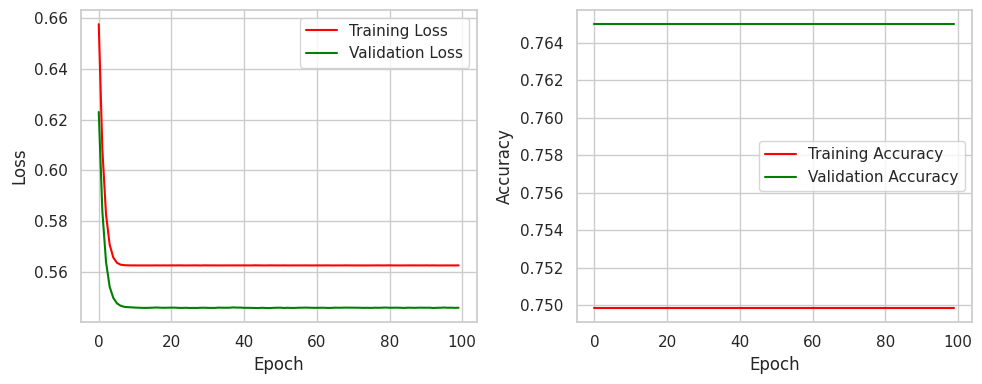

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7435 - loss: 0.5695
Units: 4, Batch Size: 32, Epochs: 100


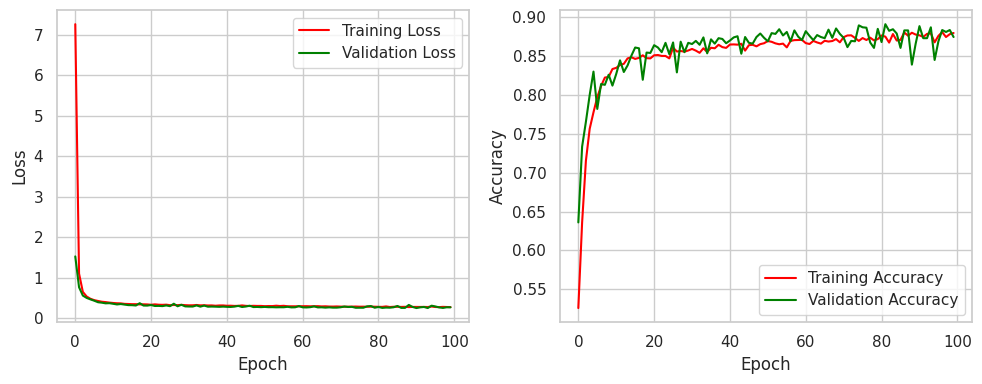

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8716 - loss: 0.2794
Units: 4, Batch Size: 64, Epochs: 100


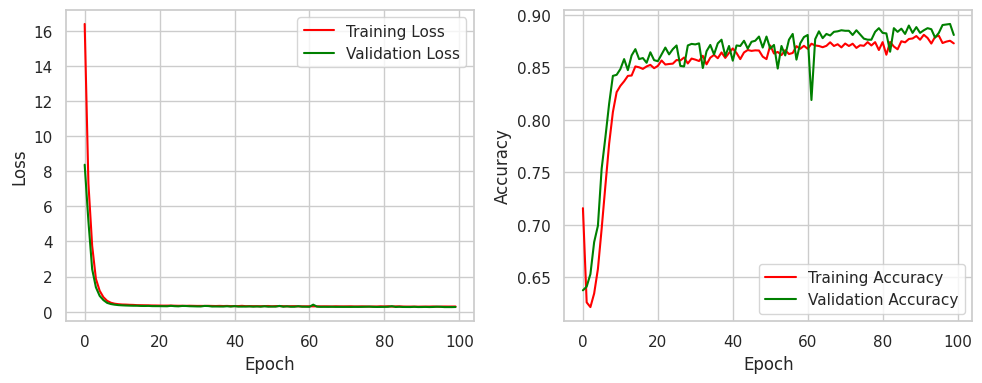

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8784 - loss: 0.2671
Units: 8, Batch Size: 16, Epochs: 100


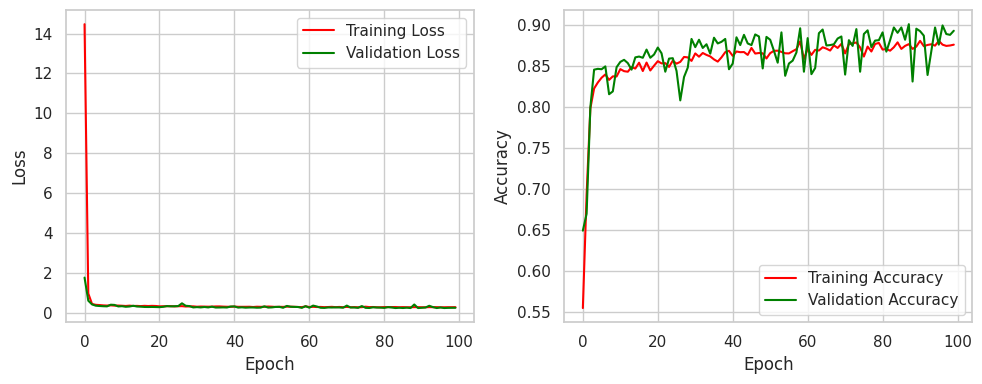

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8982 - loss: 0.2496
Units: 8, Batch Size: 32, Epochs: 100


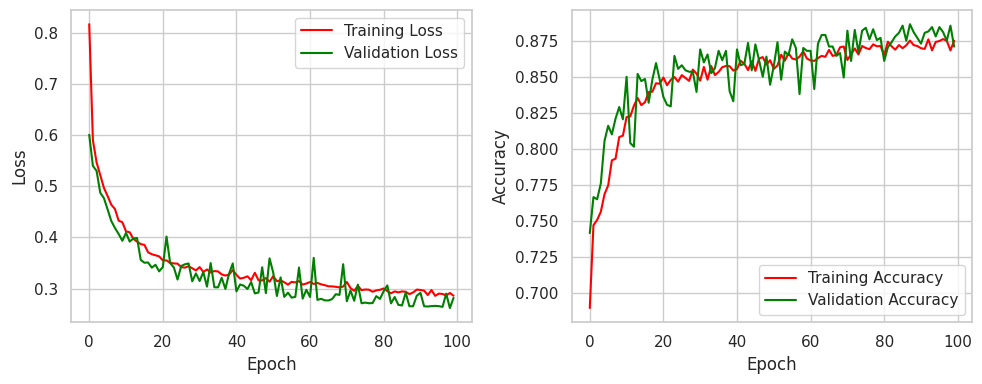

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8676 - loss: 0.2895
Units: 8, Batch Size: 64, Epochs: 100


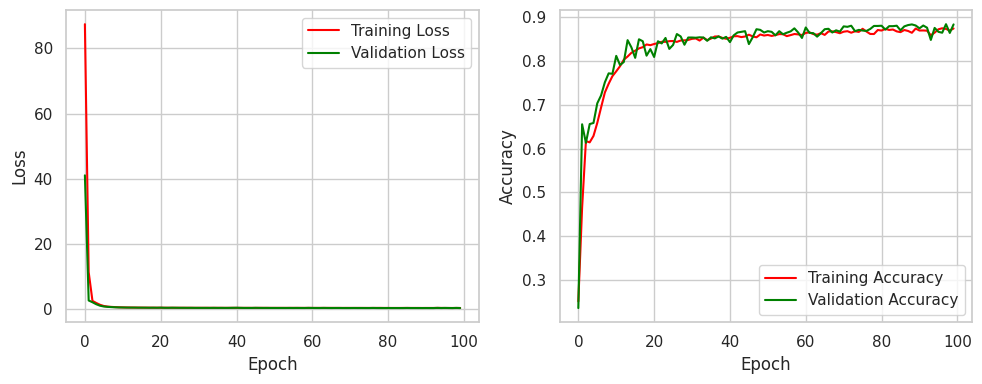

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8829 - loss: 0.2702
Units: 16, Batch Size: 16, Epochs: 100


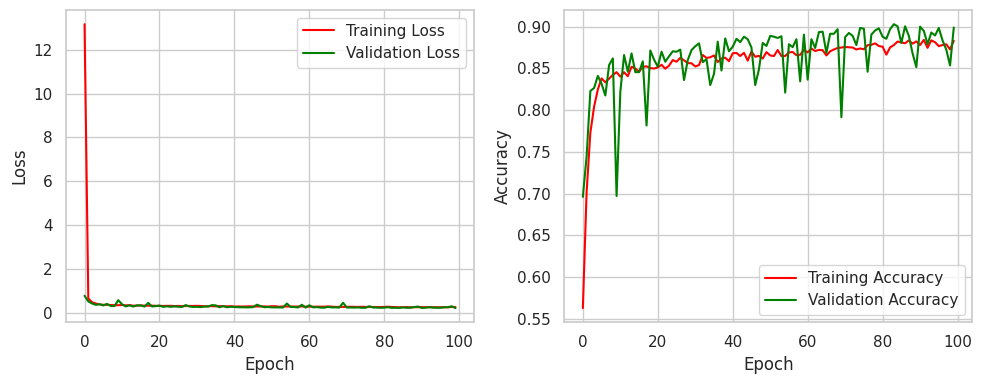

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8986 - loss: 0.2326
Units: 16, Batch Size: 32, Epochs: 100


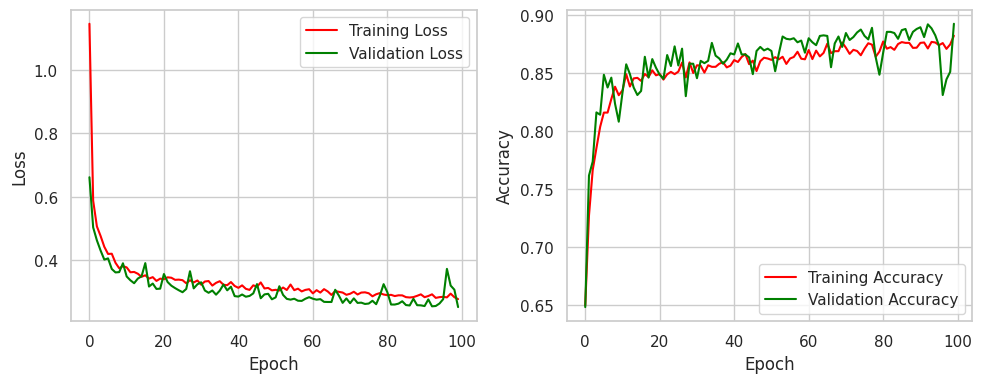

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8921 - loss: 0.2545
Units: 16, Batch Size: 64, Epochs: 100


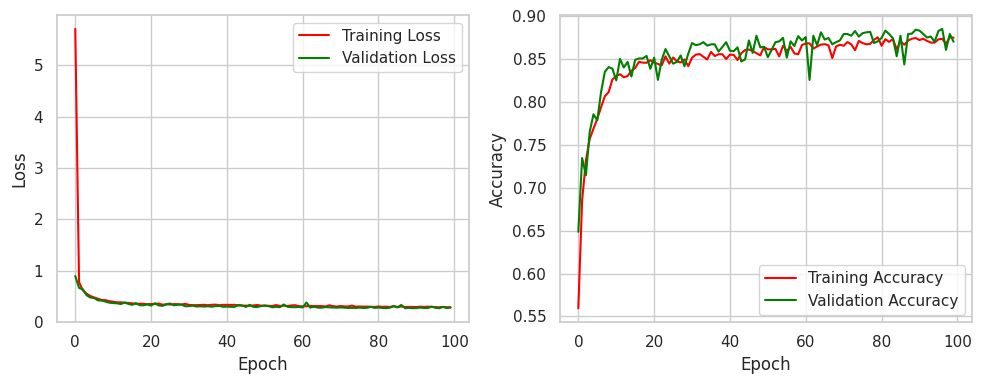

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8647 - loss: 0.2893


In [179]:
# Grid Search / Hyperparameter Tuning

least_val_loss = float("inf")
least_model = None
epochs = 100

for units in [4, 8, 16]:
    for batch_size in [16, 32, 64]:
        model, history = model_selection(units, batch_size, epochs)
        print(f"Units: {units}, Batch Size: {batch_size}, Epochs: {epochs}")
        plot_history(history)

        val_loss = model.evaluate(X_valid, y_valid)[0]

        if val_loss < least_val_loss:
            least_val_loss = val_loss
            least_model = model


In [180]:
# predicting
pred = least_model.predict(X_test)

pred.shape , pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


((2000, 1),
 array([[0.00467576],
        [0.00037388],
        [0.00499336],
        ...,
        [0.01761295],
        [0.16636392],
        [0.01127259]], dtype=float32))

In [181]:
# prediction probabilites
pred = (pred >= 0.5).astype(int)

In [182]:
# accuracy score
print("Accuracy Score : ", metrics.accuracy_score(y_test , pred))

Accuracy Score :  0.899


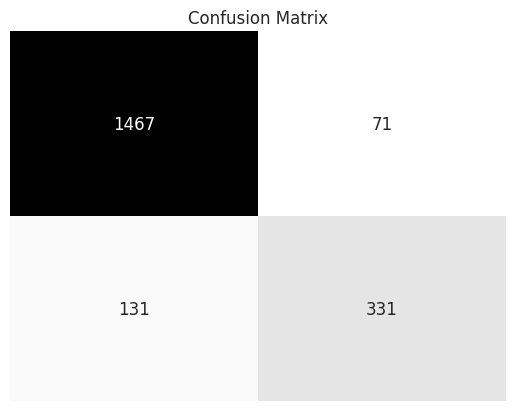

In [183]:
# confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test , pred) , annot = True , fmt= "d",cmap = "Greys" , cbar = False , xticklabels = False , yticklabels = False )
plt.title("Confusion Matrix")
plt.show()

In [188]:
# Age	Gender	BMI	Smoking_Status	Family_History	Allergies	Air_Pollution_Level	Physical_Activity_Level	Occupation_Type	Comorbidities	Medication_Adherence	Number_of_ER_Visits	Peak_Expiratory_Flow	FeNO_Level

manual_data = np.array([
    [1, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0.92, 1, 482.5, 18.2],
    [2, 1, 2, 2, 1, 1, 2, 0, 0, 1, 0.55, 4, 365.2, 36.7],
    [3, 0, 3, 1, 0, 2, 1, 1, 1, 2, 0.73, 2, 410.0, 29.5],
    [1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0.88, 0, 529.1, 20.4],
    [2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0.40, 5, 302.8, 44.6],
    [0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0.95, 0, 560.2, 16.3],
    [4, 0, 2, 2, 1, 1, 1, 0, 0, 1, 0.33, 6, 315.0, 50.1],
    [2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 0.65, 1, 487.4, 25.8],
    [1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0.90, 0, 549.0, 17.6],
    [3, 1, 3, 2, 1, 2, 2, 0, 0, 1, 0.41, 3, 298.3, 48.9]
])



print("Logistic Regression :")
for i in manual_data:
    prediction = rf_model.predict(i.reshape(1, -1))
    print("Asthma Detected :", "Yes" if prediction[0] == 1 else "No")

print("==========================")

print("\nRandom Forest :")
for i in manual_data:
    prediction = rf_model.predict(i.reshape(1, -1))
    print("Asthma Detected :", "Yes" if prediction[0] == 1 else "No")

print("==========================")

print("Neural Network (least_loss_model) : ")
for i in manual_data:
    prediction = least_model.predict(i.reshape(1, -1))
    print(prediction)
    pred_class = 1 if prediction[0][0] > 0.5 else 0
    print("Asthma Detected :", "Yes" if pred_class == 1 else "No")

Logistic Regression :
Asthma Detected : No
Asthma Detected : Yes
Asthma Detected : No
Asthma Detected : No
Asthma Detected : No
Asthma Detected : No
Asthma Detected : Yes
Asthma Detected : No
Asthma Detected : No
Asthma Detected : Yes

Random Forest :
Asthma Detected : No
Asthma Detected : Yes
Asthma Detected : No
Asthma Detected : No
Asthma Detected : No
Asthma Detected : No
Asthma Detected : Yes
Asthma Detected : No
Asthma Detected : No
Asthma Detected : Yes
Neural Network (least_loss_model) : 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.01187964]]
Asthma Detected : No
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.95929724]]
Asthma Detected : Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.37470043]]
Asthma Detected : No
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[0.00134098]]
Asthma Detected : No
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.5095365]]
Asthma Detected : Yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.0100474]]
Asthma Detected : No
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.86971974]]
A

## Saving the Model

**Purpose**: For reusability and deployment.

In [184]:

with open("model.pkl" , "wb") as file:
    pkl.dump(rf_model , file)

## Conclusion

In this project, we developed a machine learning pipeline to predict asthma risk using a synthetic medical dataset. Here's a brief summary of the key steps and findings:

- **Exploratory Data Analysis (EDA):**
  - We observed important patterns related to age, gender, and comorbidities like diabetes and hypertension.
  - Visualizations helped us understand the distribution and impact of each feature on asthma risk.

- **Data Preprocessing:**
  - Missing values were handled appropriately.
  - Categorical variables were encoded, and numerical features were standardized for model training.

- **Modeling:**
  - We built two models: **Logistic Regression** and **Random Forest Classifier**.
  - Evaluation metrics (Accuracy, Confusion Matrix) helped us compare performance.
  - _(Optional)_ The Random Forest model performed slightly better with an accuracy of **99%**, indicating it may capture non-linear patterns better than Logistic Regression.

- **Key Insight:**
  - Factors like smoking status, comorbidities, and age play a significant role in predicting asthma risk.

---
> This model can serve as an early screening tool to help doctors and public health professionals identify individuals at higher risk for asthma.